In [98]:
%matplotlib inline
%config InlineBackend.figure_format = "png2x"

from __future__ import print_function

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 200
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

# Advanced Coronagraph Specifications

In [2]:
import coronagraph as cg
print(cg.__version__)

1.1


In [3]:
# Please note that these defaults are outdated 
old_luvoir = cg.Telescope.default_luvoir()

/var/folders/ny/p7gmh16947703mhzw7_vxl4m0000gn/T/ipykernel_49771/1057003664.py:2: DeprecationWarning: These LUVOIR parameters are significantly outdated and do not reflect final values!
  old_luvoir = cg.Telescope.default_luvoir()


In [4]:
print(cg.teleplanstar.get_default_luvoir.__doc__)


    Returns the :class:`coronagraph.Telescope` for the `architecture` and
    `channel` specified by the user. 

    Parameters
    ----------
    architecture : str
        Telescope architecture, options: "A", "B", "A (APLC1)", "B (PIAA1)", "B (DMVC1)" 
    channel : str
        Wavelength channel, options: "UV", "vis", "NIR" 

    Returns
    -------
    :class:`coronagraph.Telescope` 
        Initialized telescope object with parameters specified 
    


In [5]:
# Load specifications for the LUVOIR B architecture with the PIAA coronagraph
LUVOIR_B_PIAA = cg.teleplanstar.get_default_luvoir(architecture="B (PIAA1)", channel="vis")

In `coronagraph` version 1.1 and later, there is an option to provide the model with arrays for wavelength- and $\lambda/D$-dependent quantities. These are provided to the `Telescope` class as a 2-element `tuple` with the x and y arrays as each element.  

This particular example for LUVOIR includes throughput and contrast curves from [Stark et al., (2019)](https://www.spiedigitallibrary.org/journals/Journal-of-Astronomical-Telescopes-Instruments-and-Systems/volume-5/issue-2/024009/ExoEarth-yield-landscape-for-future-direct-imaging-space-telescopes/10.1117/1.JATIS.5.2.024009.full). They can be accessed, inspected, and set using the following parameters of the `Telescope` class. 

In [6]:
# Throughput as a function of wavelength 
LUVOIR_B_PIAA.Tput_lam

(array([0.1  , 0.215, 0.24 , 0.27 , 0.305, 0.345, 0.38 , 0.43 , 0.485,
        0.55 , 0.625, 0.715, 0.805, 0.92 , 1.06 , 1.22 , 1.405, 1.62 ,
        1.87 , 2.16 , 2.405, 5.   ]),
 array([0.0691, 0.0691, 0.085 , 0.1054, 0.1281, 0.1491, 0.1281, 0.1376,
        0.2995, 0.3248, 0.2998, 0.2475, 0.1552, 0.2646, 0.3991, 0.4646,
        0.4857, 0.5044, 0.5173, 0.527 , 0.5334, 0.5334]))

In [7]:
# Throughput as a function of separation in lam/D
LUVOIR_B_PIAA.Tput_sep

(array([1.1000e-02, 9.0200e-01, 1.1540e+00, 1.3350e+00, 1.4810e+00,
        1.6270e+00, 1.9470e+00, 2.2240e+00, 2.4380e+00, 2.6070e+00,
        2.8220e+00, 2.8840e+00, 3.1060e+00, 3.3810e+00, 3.6450e+00,
        3.8880e+00, 4.1020e+00, 4.4450e+00, 4.8310e+00, 5.2550e+00,
        5.8320e+00, 6.3050e+00, 7.4250e+00, 8.5170e+00, 9.4750e+00,
        1.0736e+01, 1.2212e+01, 1.3575e+01, 1.4833e+01, 1.6213e+01,
        1.7268e+01, 1.8611e+01, 1.9799e+01, 2.1168e+01, 2.2304e+01,
        2.3615e+01, 2.5106e+01, 2.6242e+01, 2.7507e+01, 2.9237e+01,
        2.9985e+01]),
 array([0.001, 0.004, 0.01 , 0.019, 0.035, 0.054, 0.156, 0.269, 0.365,
        0.432, 0.49 , 0.51 , 0.535, 0.546, 0.566, 0.587, 0.599, 0.606,
        0.613, 0.621, 0.624, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626,
        0.626, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626,
        0.626, 0.626, 0.626, 0.626, 0.626]))

In [8]:
# Contrast as a function of separation in lam/D
LUVOIR_B_PIAA.C_sep

(array([ 1.247,  2.237,  3.079,  3.538,  4.123,  4.767,  5.174,  6.124,
         7.01 ,  7.547,  8.16 ,  8.413,  9.061,  9.759,  9.968, 11.368,
        12.052, 12.72 , 13.855, 14.943, 15.456, 16.141, 16.696, 17.347,
        17.864, 18.368, 19.448, 20.084, 20.409, 20.624, 20.911, 21.39 ]),
 array([9.920e-09, 1.865e-09, 3.860e-10, 2.449e-10, 1.119e-10, 1.706e-10,
        1.226e-10, 3.849e-11, 5.777e-11, 3.543e-11, 2.172e-11, 2.090e-11,
        2.786e-11, 2.073e-11, 1.819e-11, 2.168e-11, 1.802e-11, 1.879e-11,
        1.918e-11, 2.050e-11, 1.945e-11, 2.208e-11, 2.115e-11, 2.523e-11,
        2.441e-11, 2.852e-11, 3.397e-11, 3.881e-11, 4.624e-11, 6.822e-11,
        1.500e-10, 9.992e-09]))

## Throughput for the optics and coronagraph as a function of wavelength and planet-star separation

Naturally, it's much easier to look at the above numbers in a plot. This is what the optical throughput and core throughput look like for this LUVOIR example case. 

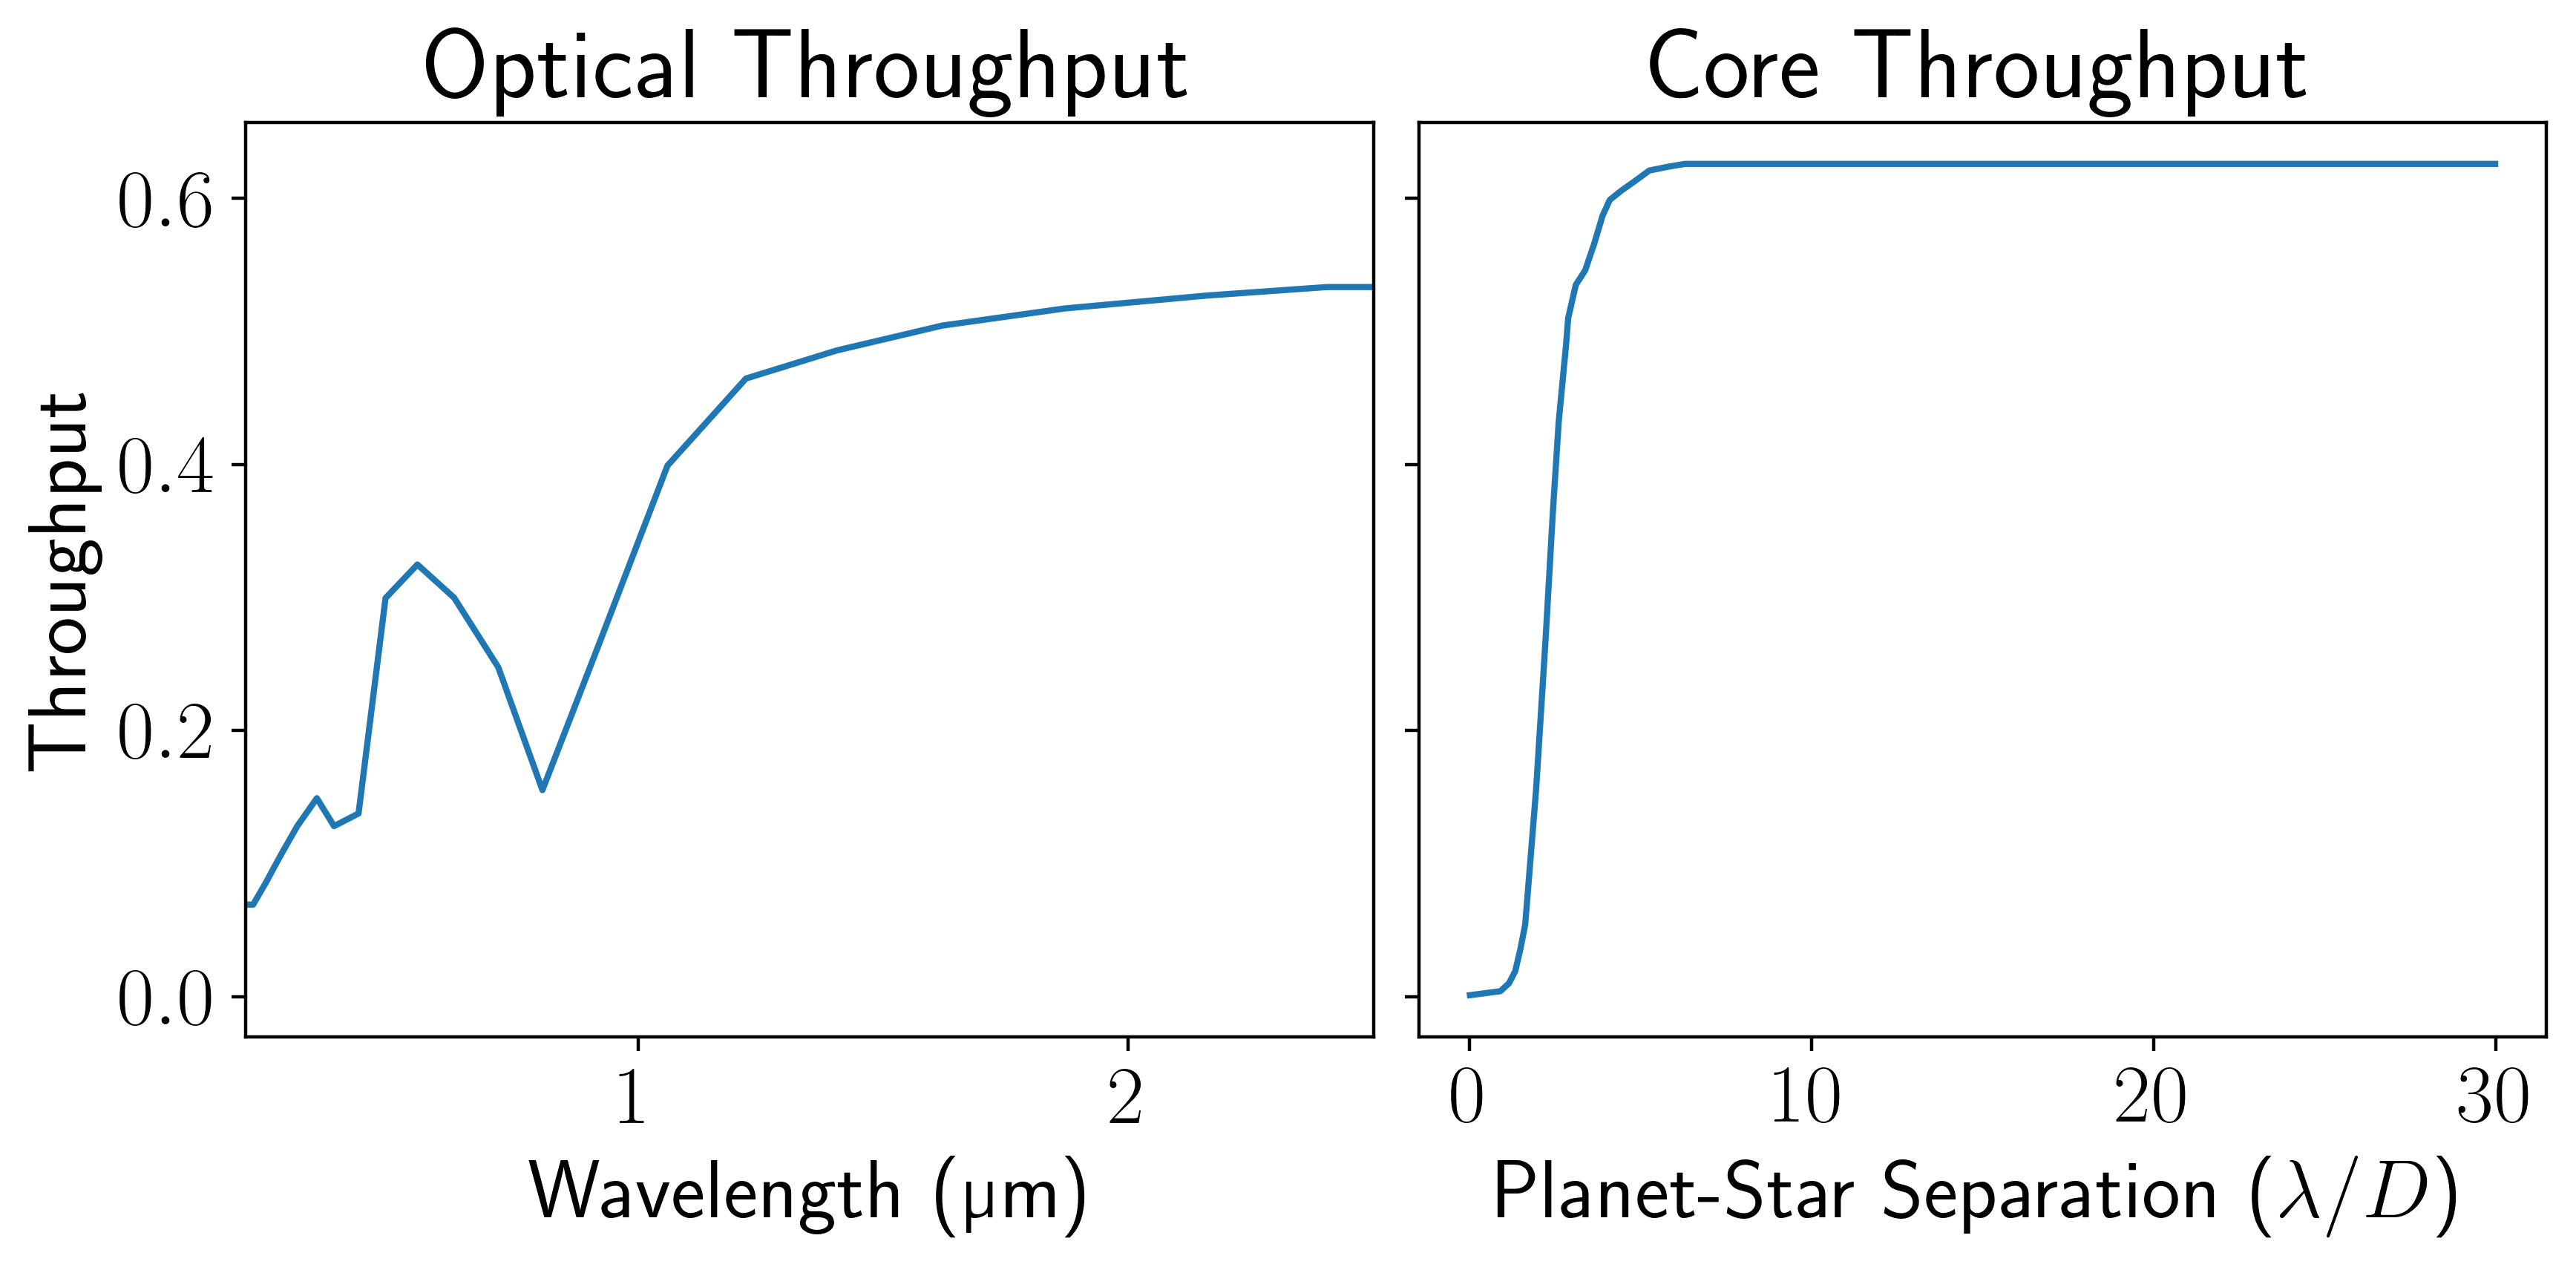

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=True, gridspec_kw={"wspace" : 0.04})

axes[0].set_xlabel("Wavelength (µm)")
axes[0].set_ylabel("Throughput")
axes[0].set_title("Optical Throughput")
axes[0].plot(*LUVOIR_B_PIAA.Tput_lam)
axes[0].set_xlim(0.2, 2.5)

axes[1].set_xlabel("Planet-Star Separation ($\lambda/D$)")
axes[1].set_title("Core Throughput")
axes[1].plot(*LUVOIR_B_PIAA.Tput_sep)

Internally, the `count_rates()` function uses the following 1D linear interpolation to map the core throughput from this curve onto the planet to star separation as a function of wavelength. 

In [10]:
import scipy as sp

tfunc = sp.interpolate.interp1d(LUVOIR_B_PIAA.Tput_sep[0], LUVOIR_B_PIAA.Tput_sep[1],
                                bounds_error = False, fill_value=np.nan)

So at $N=1 \lambda/D$, we get the following core throughput: 

In [11]:
T = tfunc(1.0).reshape(-1)[0]
print(T)

0.006333333333333333


which is quite small, but not zero. 

We can reverse this interpolation to solve for the separation given a throughput value: 

In [12]:
tfunc2 = sp.interpolate.interp1d(LUVOIR_B_PIAA.Tput_sep[1], LUVOIR_B_PIAA.Tput_sep[0], 
                                 bounds_error = False, fill_value=np.nan)

This is useful because we can identify the 50% throughput point, which is the typical simplified number used to describe a coronagraph's IWA. In this case, that gives 

In [13]:
N_IWA = tfunc2(0.5).reshape(-1)[0]
print("%.2f lam/D" %N_IWA)

2.85 lam/D


## Contrast as a function of planet-star separation ($\lambda/D$) 

Similar to the above, the raw contrast of a coronagraph varies with planet-star separation as a function of $\lambda/D$. The PIAA coronagraph from Stark et al. (2019) has the following contrast curve. 

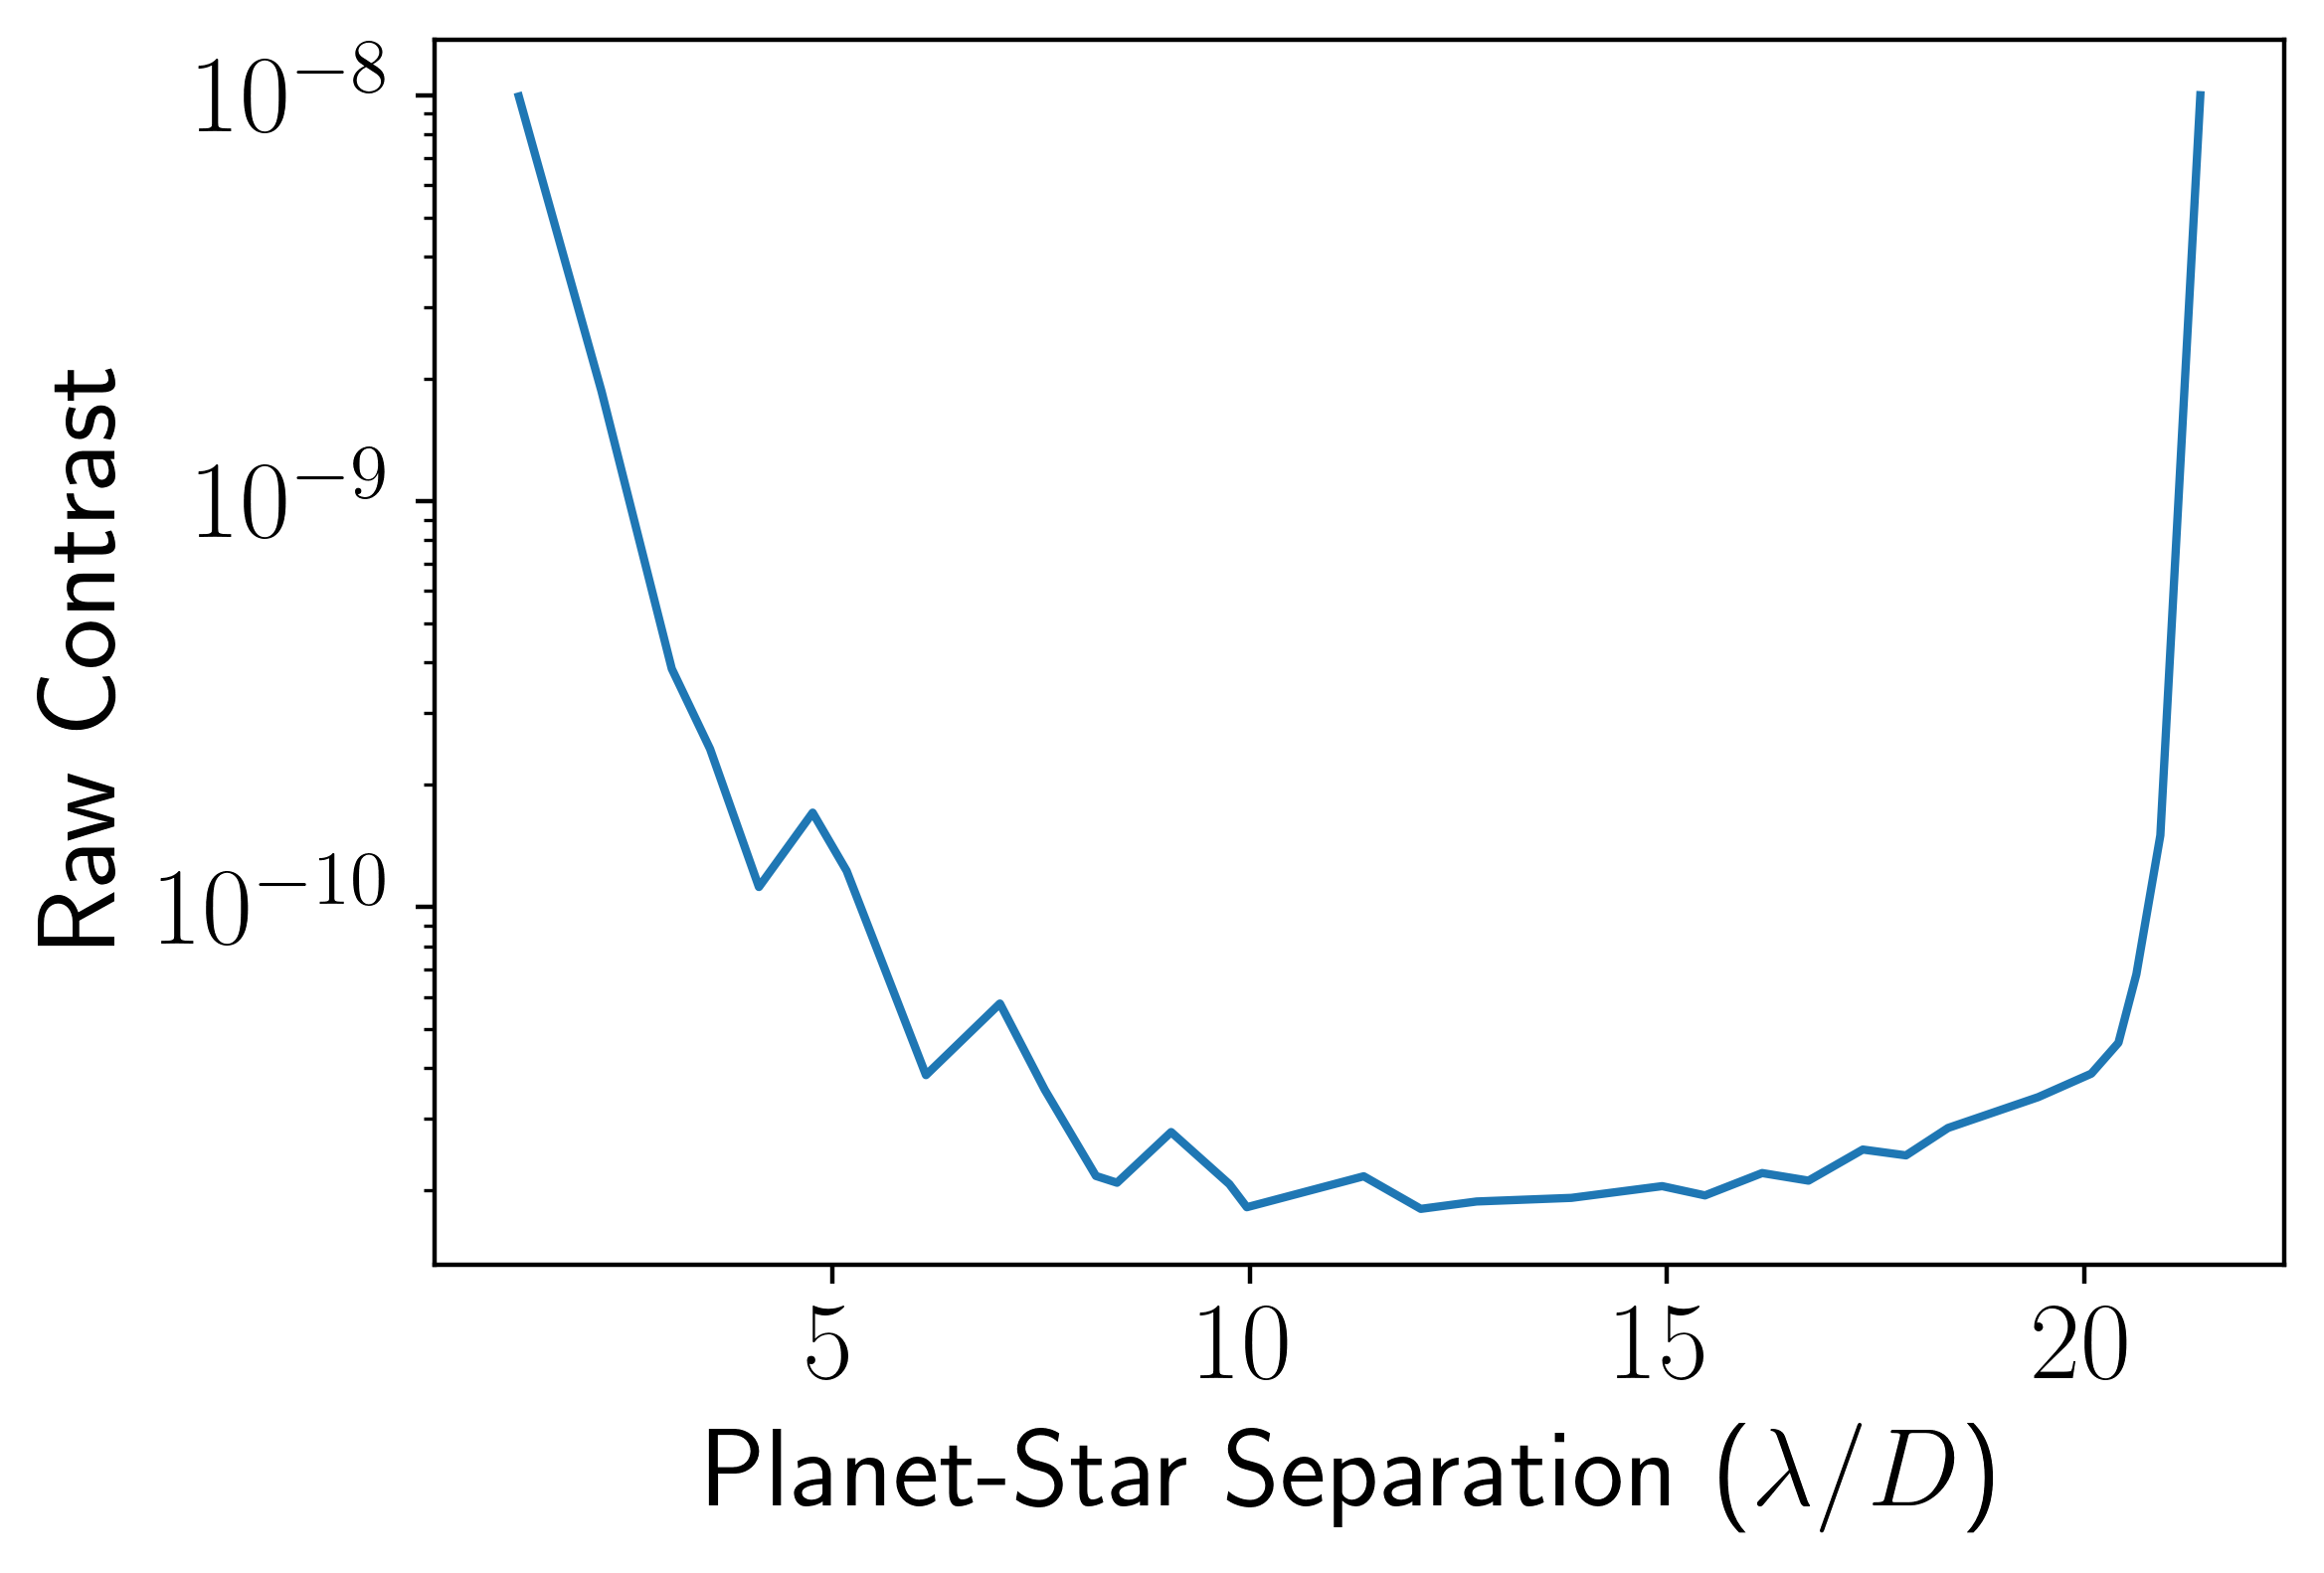

In [16]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(*LUVOIR_B_PIAA.C_sep)

ax.set_xlabel("Planet-Star Separation ($\lambda/D$)")
ax.set_ylabel("Raw Contrast")
ax.set_title("")
ax.set_yscale("log")

In this case, the benchmark value of $C \le 10^{-10}$ is only met between about 5 and 20 $\lambda/D$. 

Now let's see how including these throughput and contrast curves impacts the noise budget and ability to characterize small Earth-like exoplanets. 

## Example Case 1: Earth at 10 pc  

For this example we will reproduce the quickstart tutorial using our coronagraph modifications. We'll start with the default `planet` and `star`, which gives us Earth at quadrature around the Sun at 10 pc. 

In [18]:
planet = cg.Planet()
print(planet)

Planet: 
-------
- Planet name  : earth
- Stellar type of planet host star : sun
- Distance to system (pc) : 10.0
- Number of exzodis (zodis) : 1.0
- Radius of planet (Earth Radii) : 1.0
- Semi-major axis (AU) : 1.0
- Phase angle (deg) : 90.0
- Lambertian phase function : 0.3183098861837907
- Zodiacal light surface brightness (mag/arcsec**2) : 23.0
- Exozodiacal light surface brightness (mag/arcsec**2) : 22.0


In [19]:
star = cg.Star()
print(star)

Star: 
-----
- Effective Temperature (K) : 5780.0
- Radius (Solar Radii) : 1.0


Again, we'll use the Earth's geometric albedo spectrum from [Robinson et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011AsBio..11..393R/abstract), but if you are following along at home, feel free to use a different spectrum that you have generated or obtained.  

In [20]:
# Load Earth albedo spectrum from Robinson et al. (2011)
lamhr, Ahr, fstar = cg.get_earth_reflect_spectrum()

Now we can initialize a `CoronagraphNoise` object and provide it with our LUVOIR-B `telescope`, and our Earth around the sun `planet` and `star`:  

In [22]:
# Define CoronagraphNoise object using our telescope, planet, and star
noise = cg.CoronagraphNoise(
                            telescope = LUVOIR_B_PIAA, 
                            planet = planet, 
                            star = star, 
                            texp = 10.0, 
                            wantsnr = 10.0
                           )

All we have to do is calculate the count rates and then we can examine the outputs. 

In [23]:
# Calculate the planet and noise photon count rates
noise.run_count_rates(Ahr, lamhr, fstar)

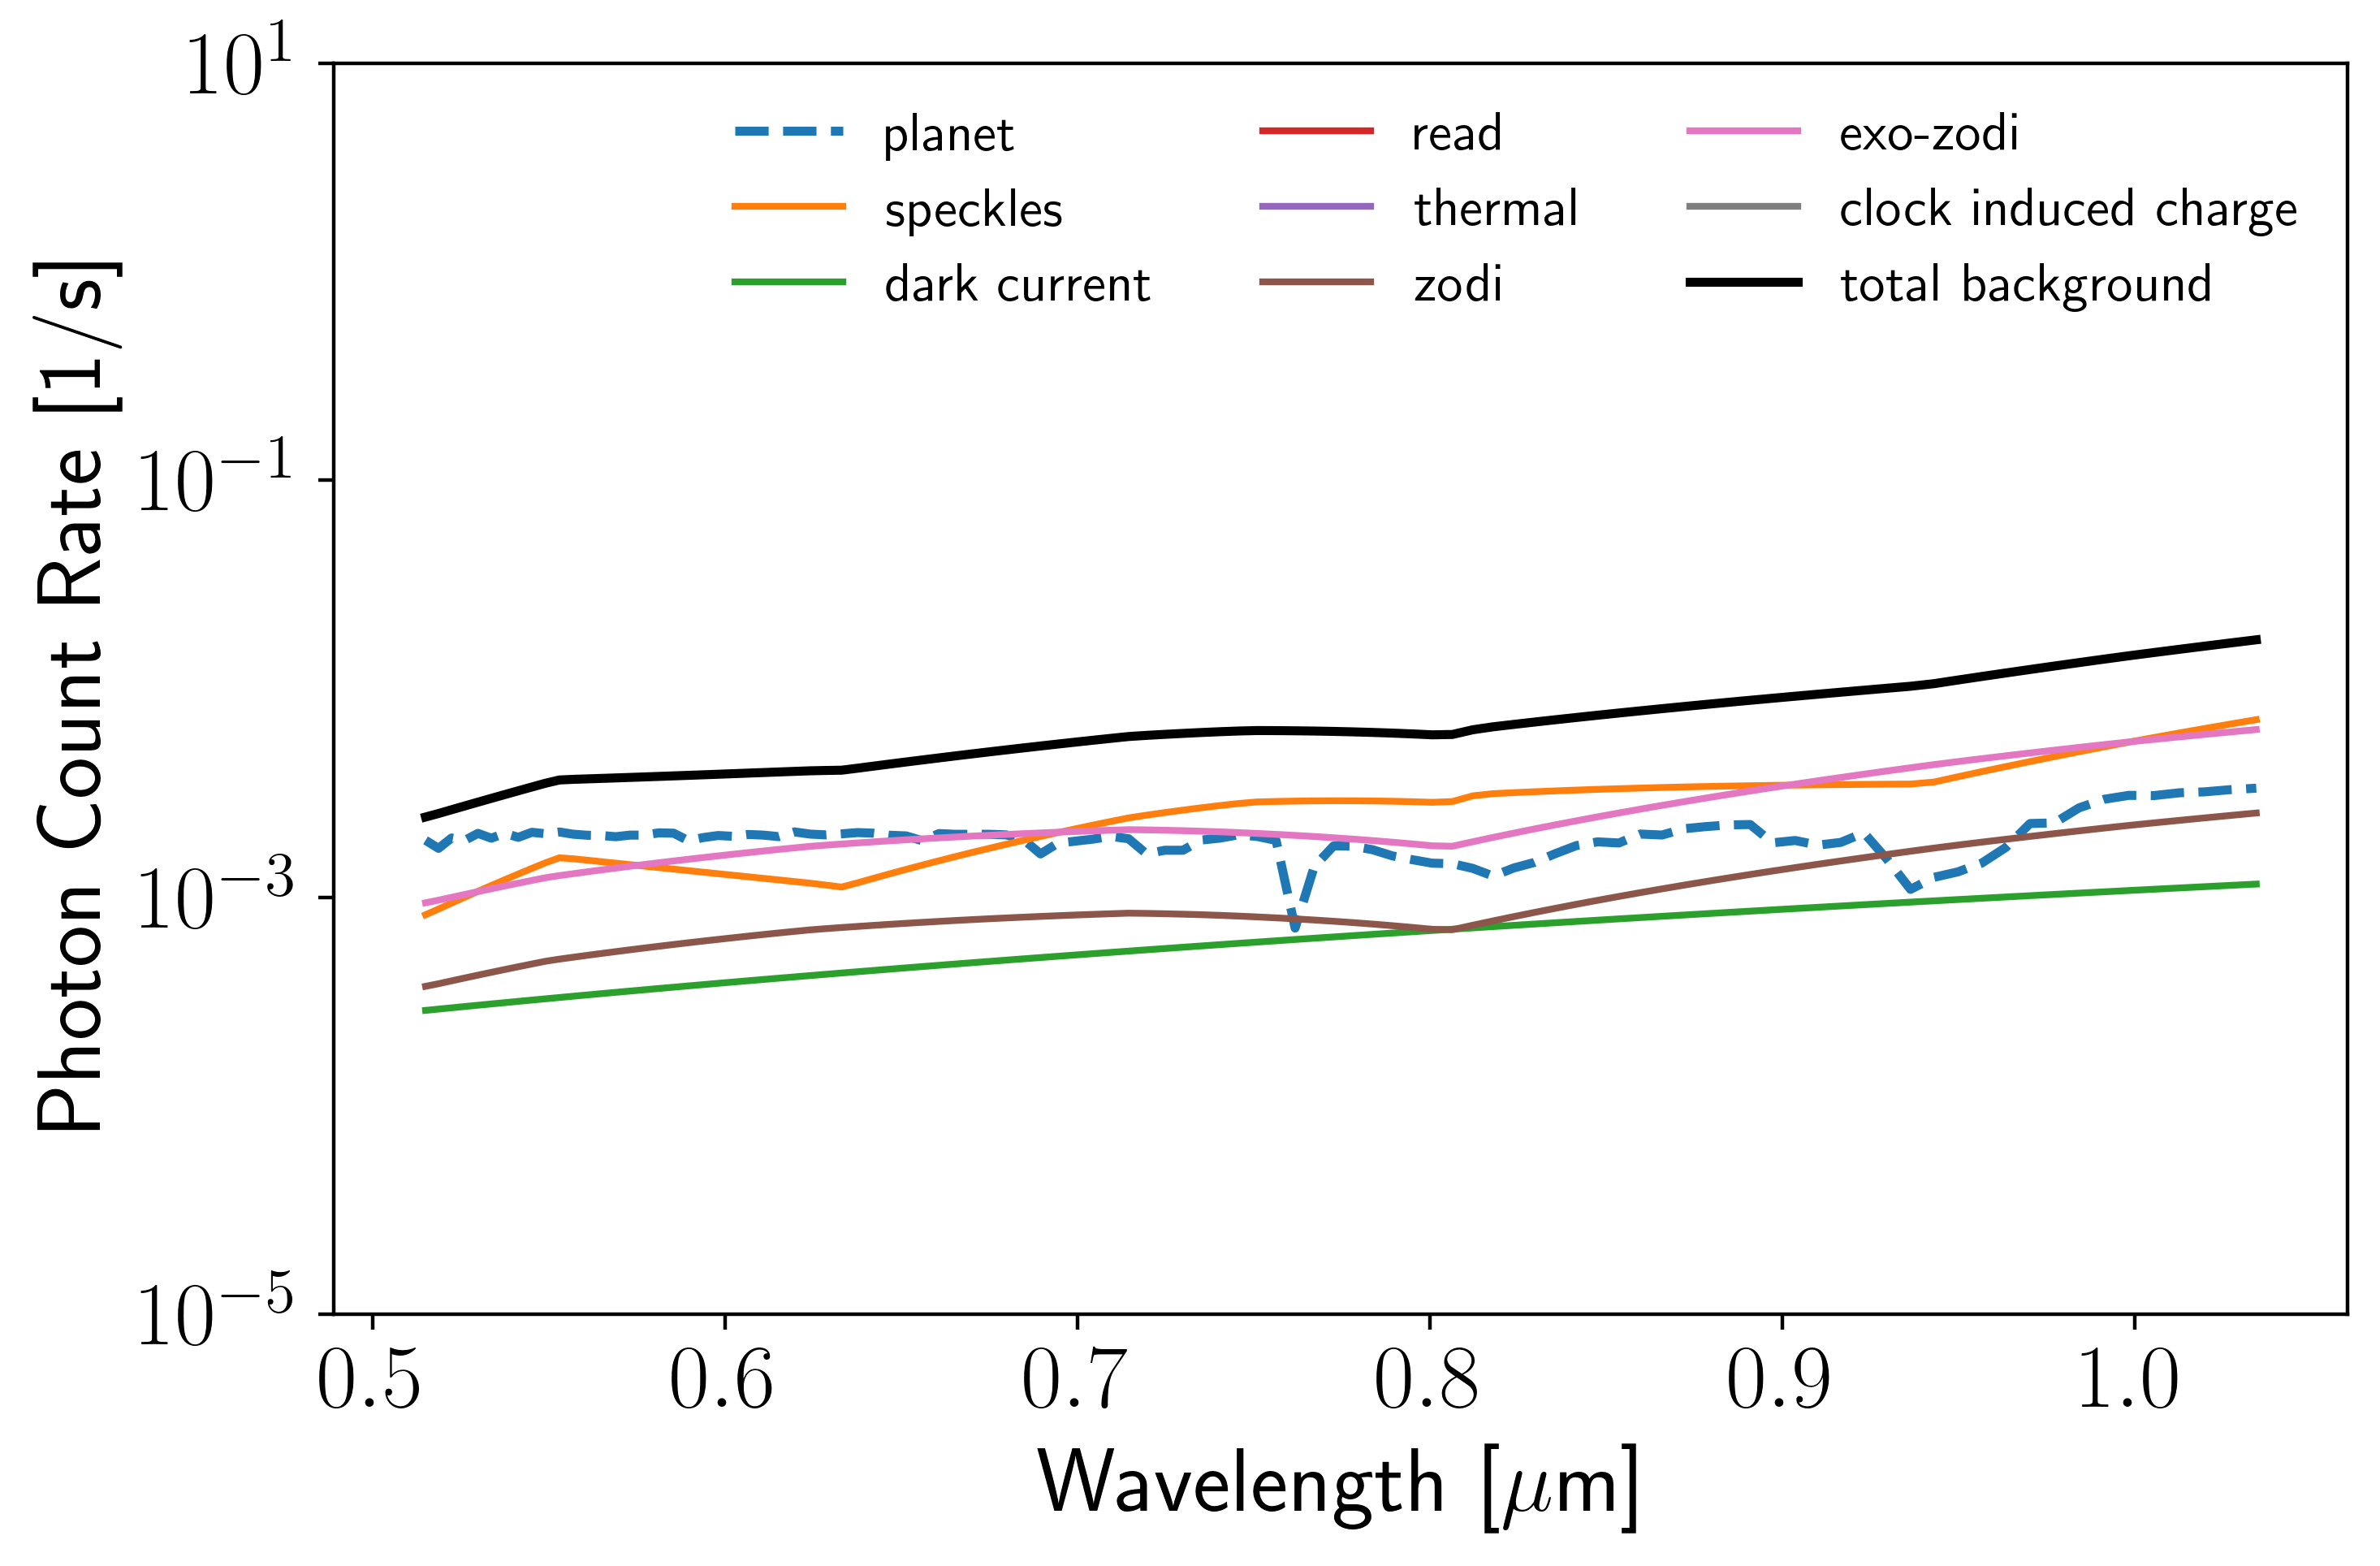

In [24]:
# Make plot
fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Photon Count Rate [1/s]")

# Plot the different photon count rates
ax.plot(noise.lam, noise.cp, label = "planet", lw = 2.0, ls = "dashed")
ax.plot(noise.lam, noise.csp, label = "speckles")
ax.plot(noise.lam, noise.cD, label = "dark current")
ax.plot(noise.lam, noise.cR, label = "read")
ax.plot(noise.lam, noise.cth, label = "thermal")
ax.plot(noise.lam, noise.cz, label = "zodi")
ax.plot(noise.lam, noise.cez, label = "exo-zodi")
ax.plot(noise.lam, noise.cc, label = "clock induced charge")
ax.plot(noise.lam, noise.cb, label = "total background", lw = 2.0, color = "k")

# Tweak aesthetics 
ax.set_yscale("log")
ax.set_ylim(bottom = 1e-5, top = 1e1)
ax.legend(fontsize = 12, framealpha = 0.0, ncol = 3);

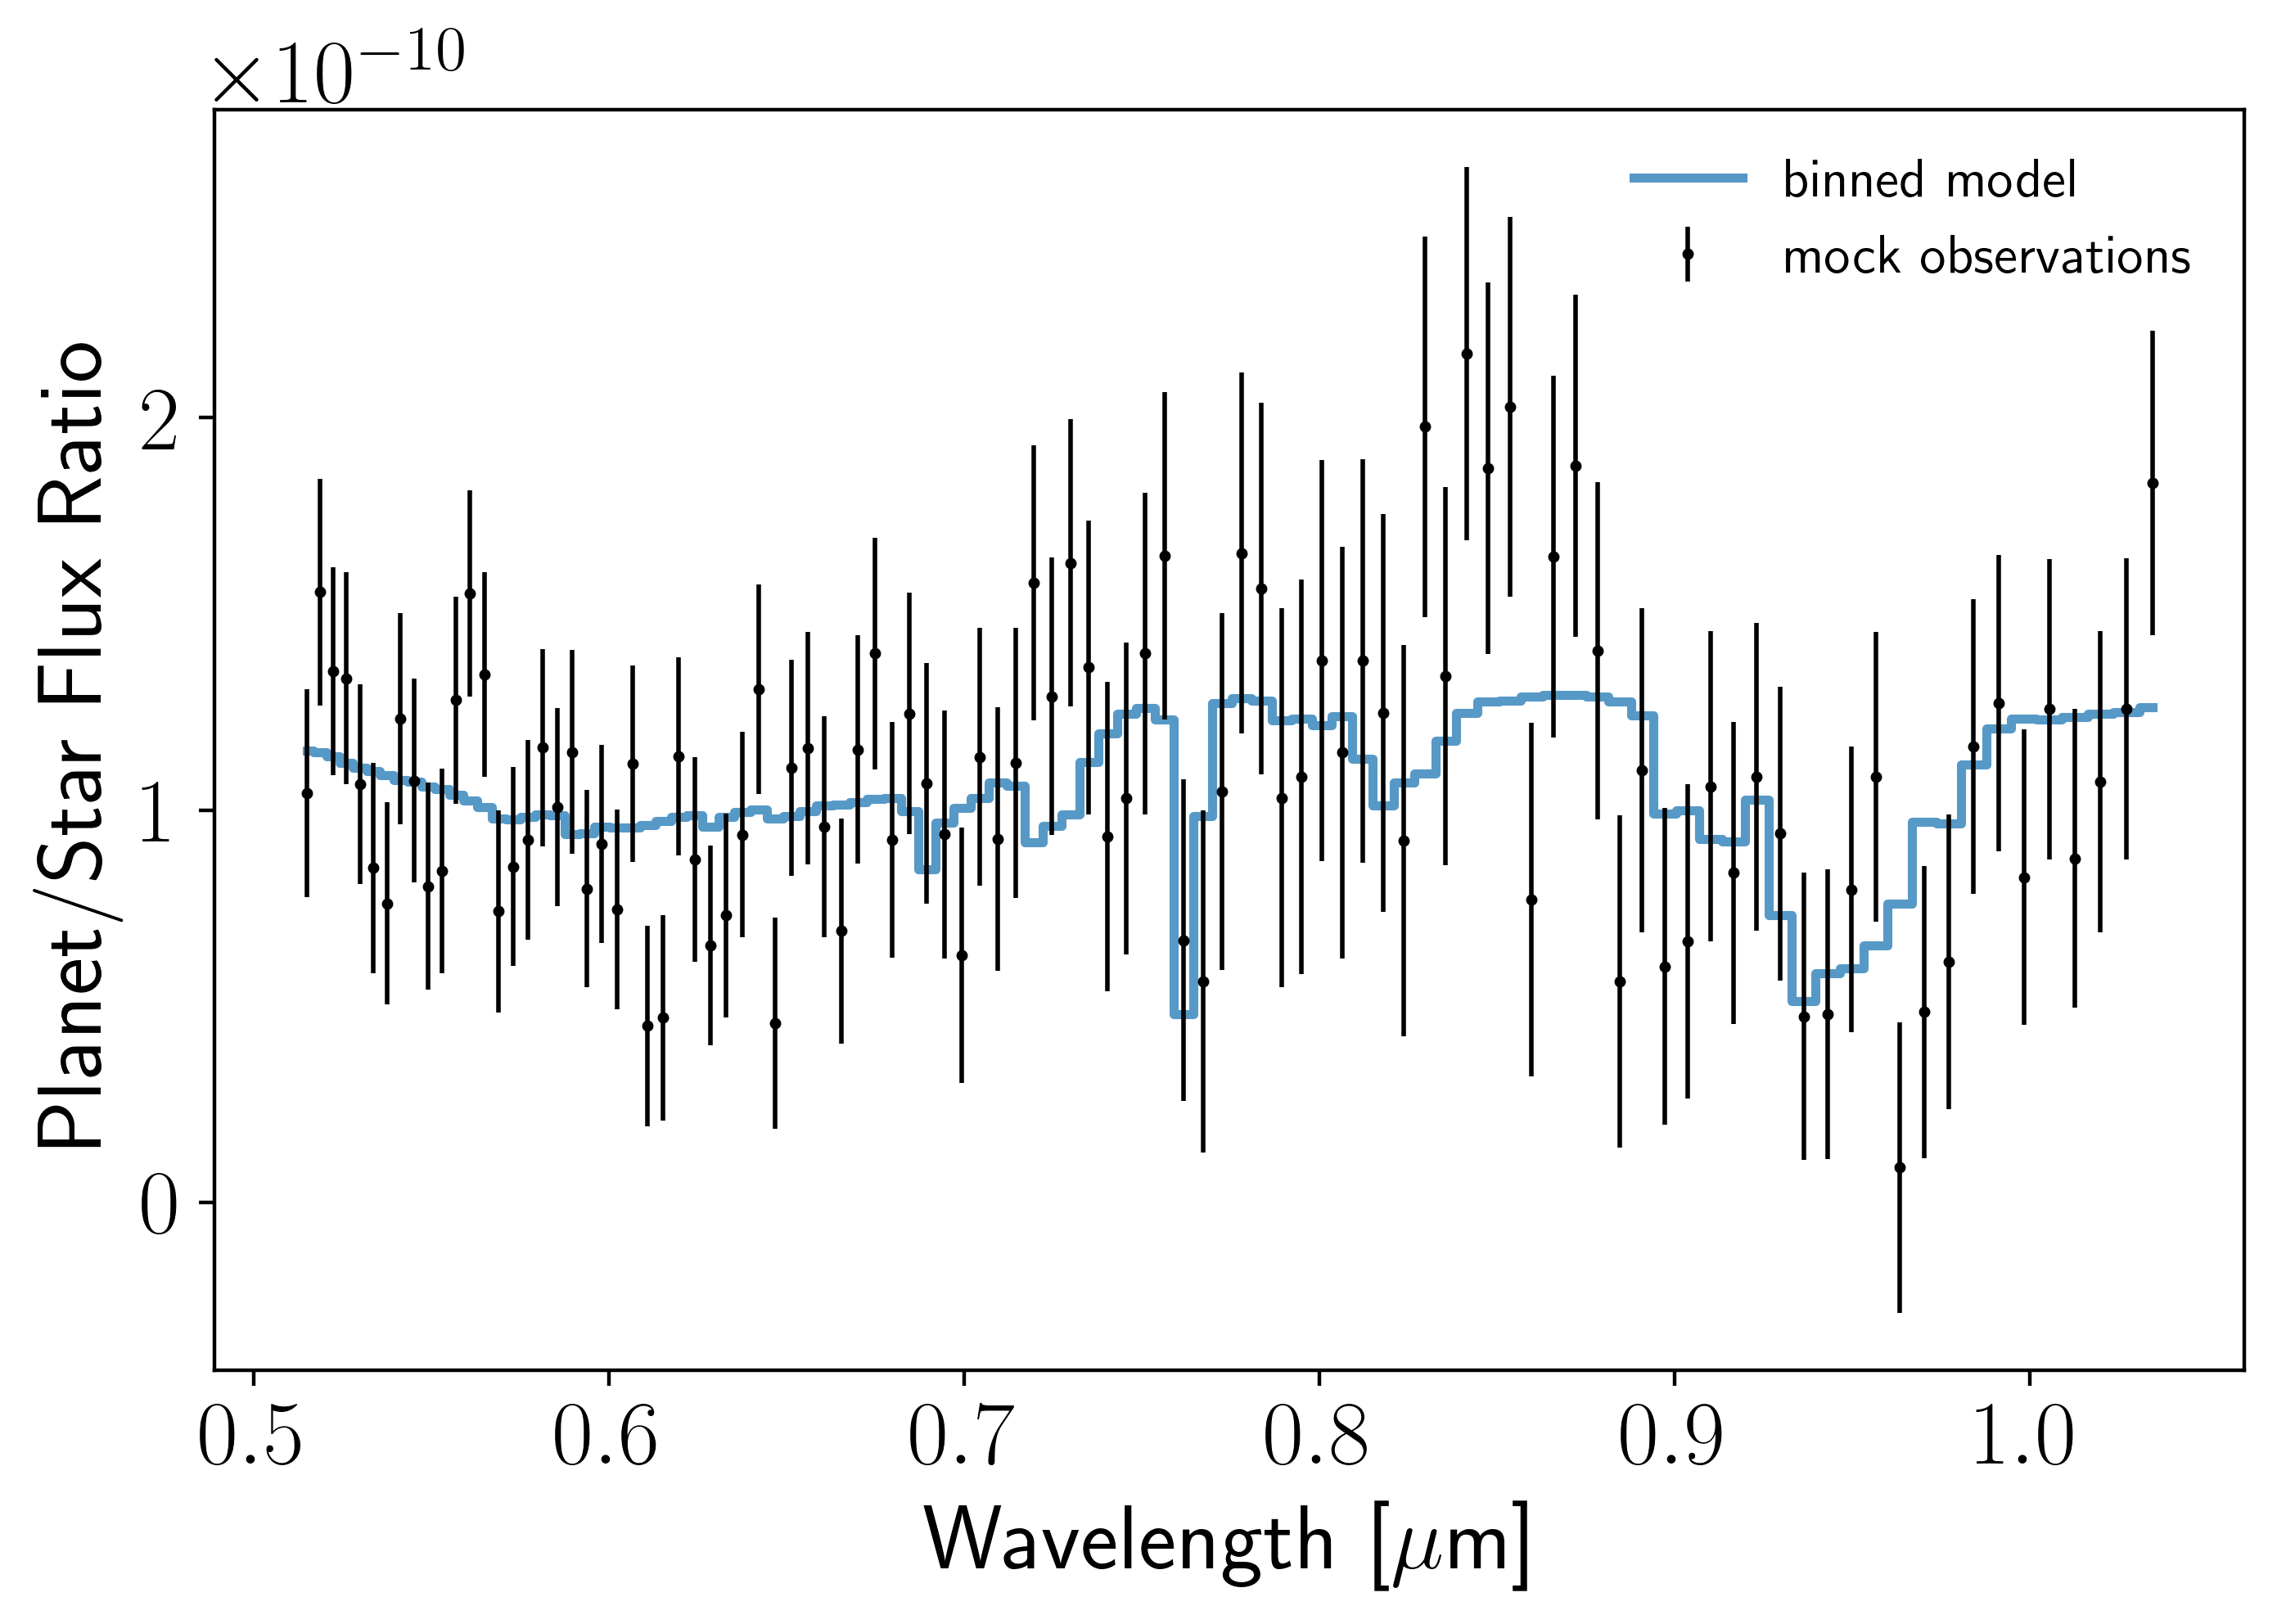

In [97]:
# Make plot
fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Planet/Star Flux Ratio")

# Plot the spectrum
#ax.plot(lamhr[m], Ahr[m], label = "high-res model")
ax.plot(noise.lam, noise.Cratio, label = "binned model", lw = 2.0, ds = "steps-mid", alpha = 0.75)
ax.errorbar(noise.lam, noise.Cobs, yerr=noise.Csig, fmt = ".", c = "k", ms = 3, lw = 1.0, label = "mock observations")

# Tweak aesthetics 
ax.legend(fontsize = 12, framealpha = 0.0);

Great! But what does this really mean to us? To examine how this calculation is different when we use the wavelength-dependent throughputs, let's make a copy of our initial calculation and and remove this new throughput. 

In [149]:
import copy

# Make a copy of the initial calculation and remove the wavelength-dependent throughput
noise2 = copy.deepcopy(noise)
noise2.telescope.Tput_lam = None

# Calculate the planet and noise photon count rates
noise2.run_count_rates(Ahr, lamhr, fstar)

Note that when `telescope.Tput_lam` is included it is used instead of the `telescope.throughput` single value. So we have just reverted back to using the `telescope.throughput`, which is a flat value of 

In [150]:
LUVOIR_B_PIAA.throughput

0.48

Let's take a look at how the spectrum and, in paricular, the error bars have changed. 

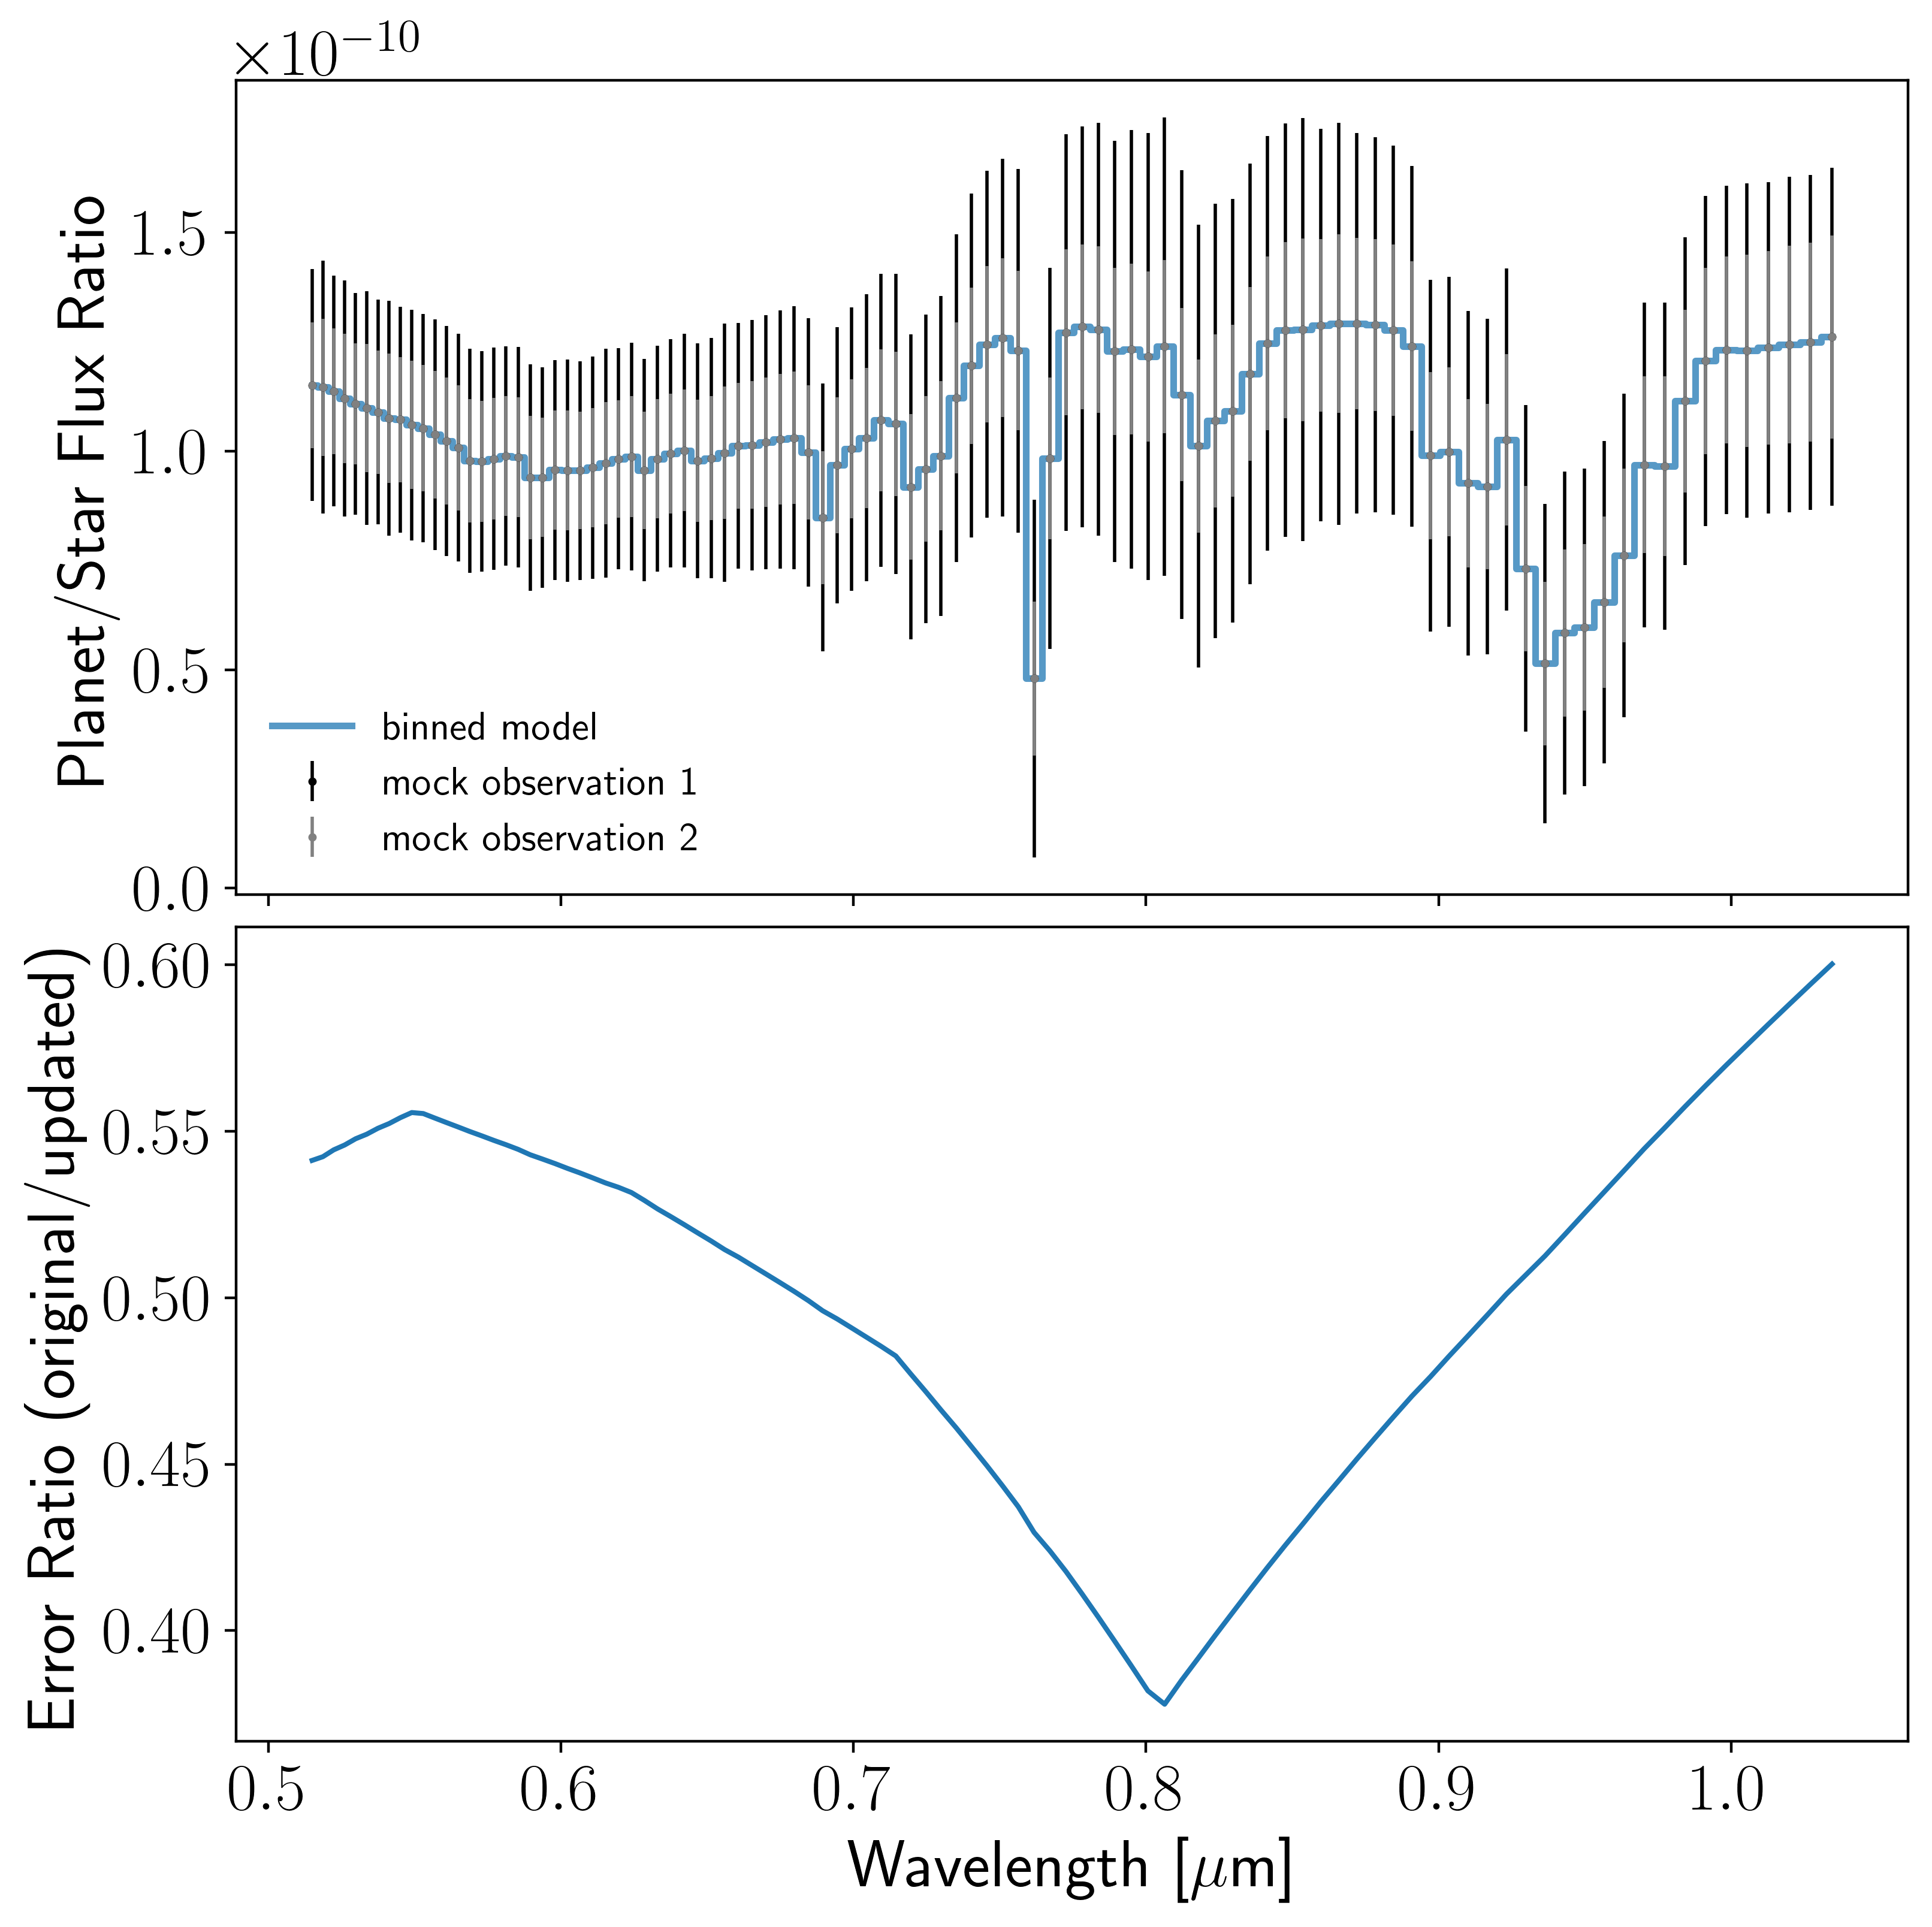

In [69]:
# Make plot
fig, axes = plt.subplots(2,1, figsize=(9,9), sharex=True, gridspec_kw={"hspace" : 0.04})

ax = axes[0]
ax.set_ylabel("Planet/Star Flux Ratio")

# Plot the simulated data
ax.plot(noise.lam, noise.Cratio, label = "binned model", lw = 2.0, ds = "steps-mid", alpha = 0.75)
ax.errorbar(noise.lam, noise.Cratio, yerr=noise.Csig, fmt = ".", c = "k", ms = 3, lw = 1.0, label = "mock observation 1")
ax.errorbar(noise2.lam, noise2.Cratio, yerr=noise2.Csig, fmt = ".", c = "grey", ms = 3, lw = 1.0, label = "mock observation 2")

# Tweak aesthetics 
ax.legend(loc = "lower left", fontsize = 12, framealpha = 0.0);

ax = axes[1]
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Error Ratio (original/updated)")
ax.plot(noise.lam, noise2.Csig/noise.Csig)

The 1 sigma errorbars are larger with the new wavelength-dependent throughput included. Looking at optical throughput curve above, we see the same shape as seen in the lower panel here. In this case our static throughput of 0.48 assumed for LUVOIR-B when we didn't have this file included was optimistic and including this more realistic throughput allows us to better predict performance for cases where the optical throughput of an observatory may be known, or different options are being actively investigated. 

## Example Case 2: Phase-Dependence of Coronagraph Observations 

In this second example case, we'll simulate observations of our simple Earth-like planet at 10 pc at different phases to appreciate the impact of projected separation on the coronagraph noise budget. 

Note that this example is about the effect of phase on the projected planet-star separation and does not include the *actual phase dependence of the Earth's spectrum*. For more of the fundamentals on Earth's intrinsic phase dependence in reflected light, please refer to Robinson et al. ([2010](https://ui.adsabs.harvard.edu/abs/2010ApJ...721L..67R/abstract); [2011](https://ui.adsabs.harvard.edu/abs/2011AsBio..11..393R/abstract)).   

Let's start with a grid of planet phases over which we want to do coronagraph calculations. We can 

Text(0, 0.5, 'Lambert Phase Function ($\\Psi$)')

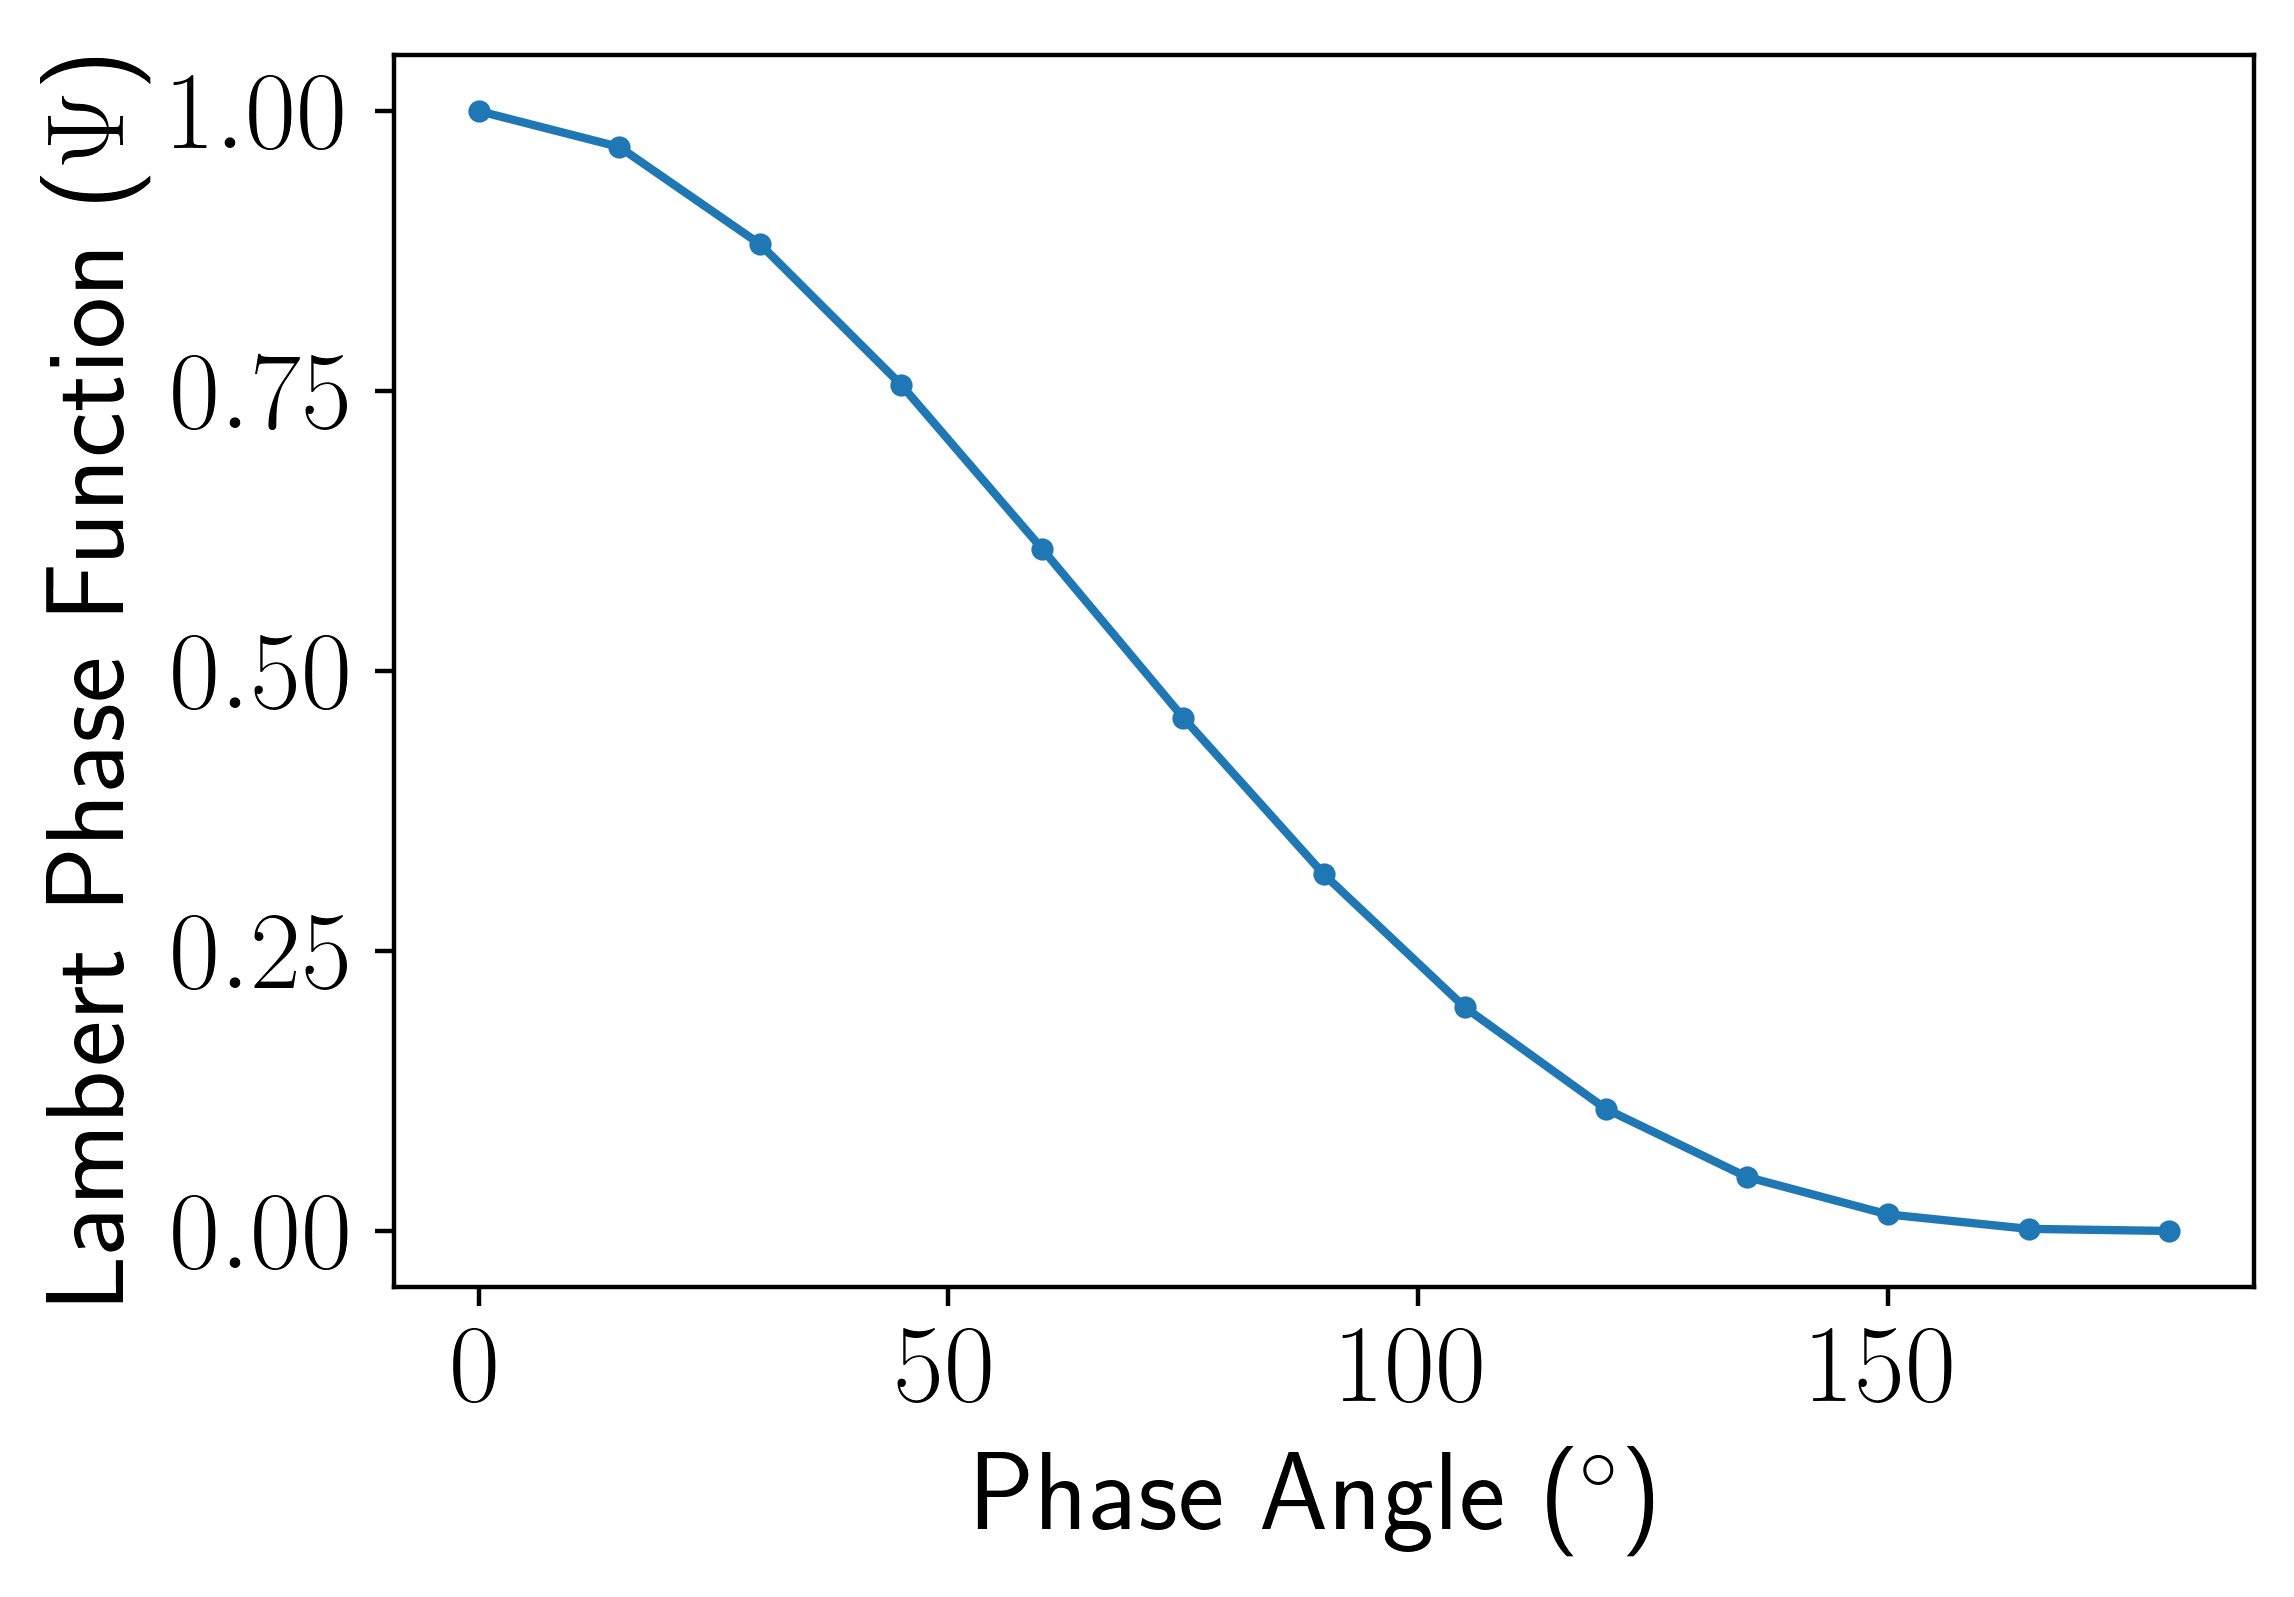

In [151]:
phases = np.linspace(0,180,13)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(phases, cg.noise_routines.lambertPhaseFunction(phases), ".-")
ax.set_xlabel("Phase Angle ($^{\circ}$)")
ax.set_ylabel("Lambert Phase Function ($\Psi$)")

Now let's loop over these phases and repeat our fiducial calculation at each phase.  

In [152]:
# A place to store our results
noise_calculations = []

# Loop over phases
for i, alpha in enumerate(phases): 

    # Make a copy of the initial calculation and remove the wavelength-dependent throughput
    noise_tmp = copy.deepcopy(noise)
    
    # Set the phase angle for the planet
    noise_tmp.planet.alpha = alpha

    # Calculate the planet and noise photon count rates
    noise_tmp.run_count_rates(Ahr, lamhr, fstar)
    
    # Append to list to save result
    noise_calculations.append(noise_tmp)

First we can take a look at the spectrum of the planet at each of these phases, which is dominated by the brightness of the visible portion of the illuminated planet disk.  

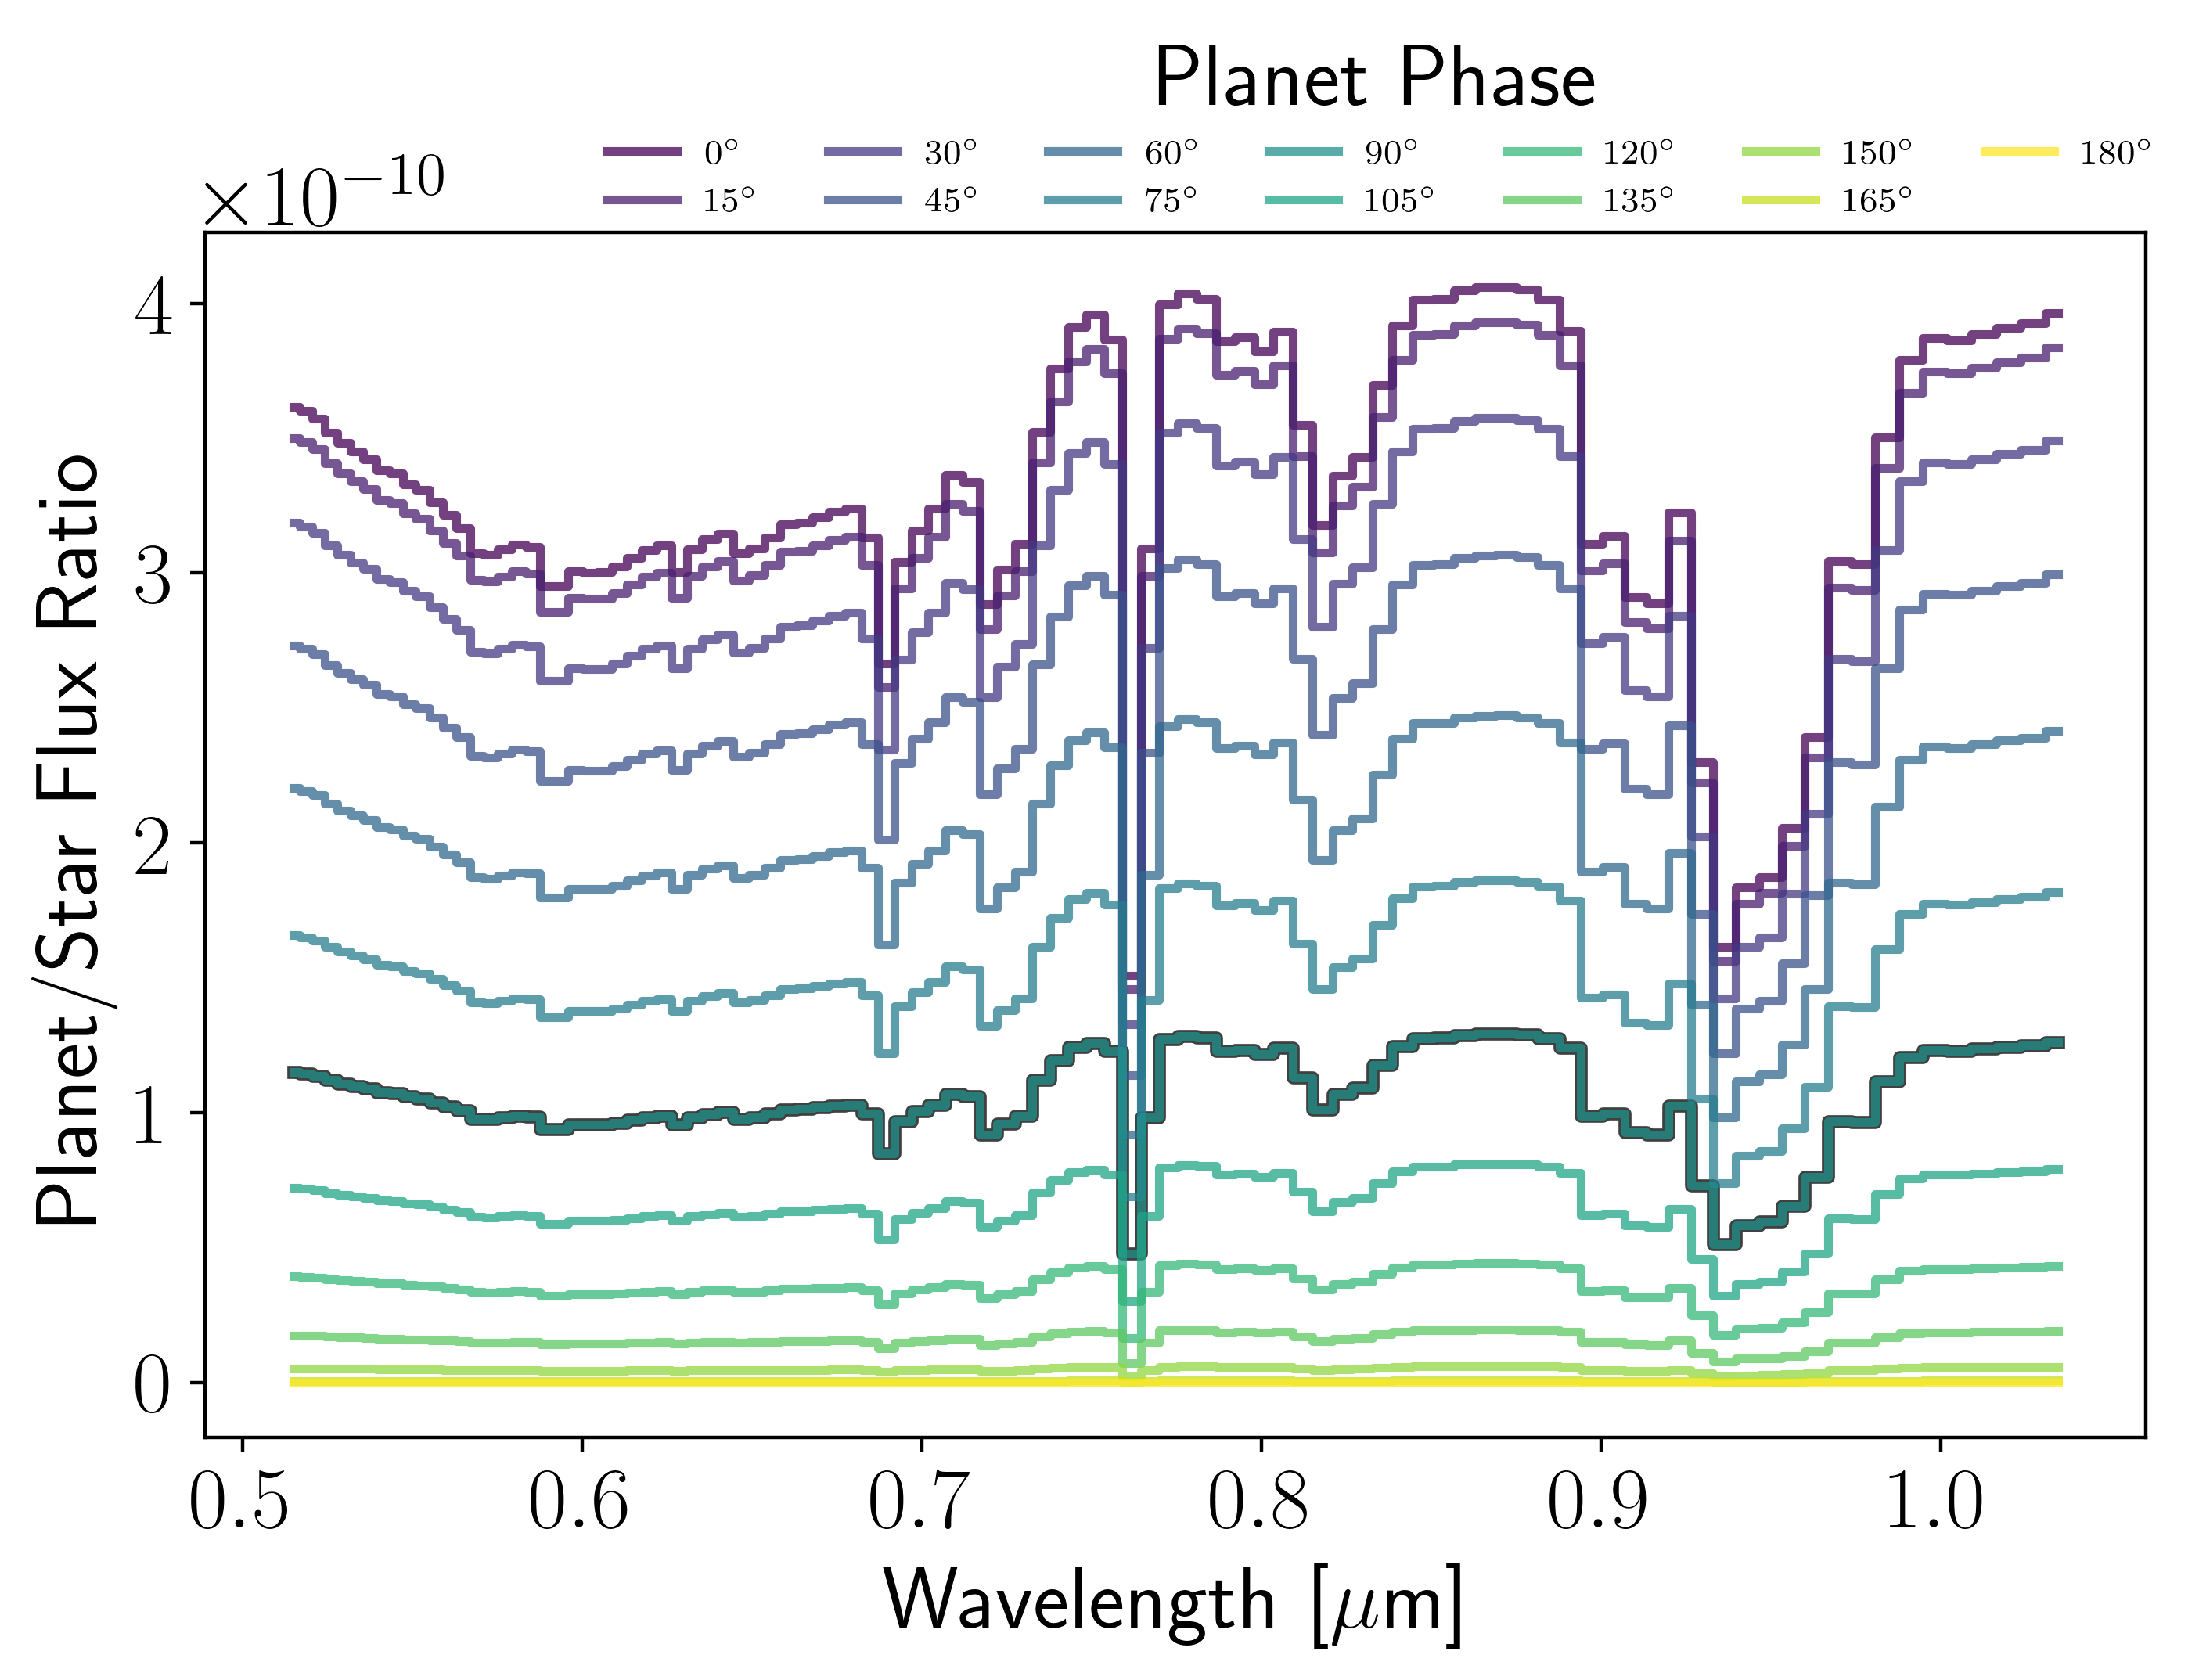

In [163]:
# Make plot
fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Planet/Star Flux Ratio")

colors = mpl.cm.viridis(np.linspace(0.0, 1.0, len(phases)))

ax.plot(noise.lam, noise.Cratio, lw = 3.0, ds = "steps-mid", alpha = 0.75, color="k")

for i, noise_tmp in enumerate(noise_calculations): 

    # Plot the spectrum
    ax.plot(noise_tmp.lam, noise_tmp.Cratio, label = "$%i^{\circ}$" %phases[i], lw = 2.0, ds = "steps-mid", alpha = 0.75, color=colors[i])
    
# Logging the plot is also quite appropriate
#ax.set_yscale("log")

# Tweak aesthetics 
#ax.set_ylim(bottom = 0.0, top = 0.4)
ax.legend(loc=(0.2, 1.0), fontsize = 8, framealpha = 0.0, ncol=7, title="Planet Phase");

The small phase angles are more Gibbous/full phases and are correspondingly brighter, while the large phase angles are more crescent and are correspondingly fainter. While brightness is a significant factor here, it is only half of the equation because both the crescent and gibbous phases have small planet-star separations and push up against the coronagraph IWA. With separation-dependent contrast and throughput included, we get more nuanced results in terms of the SNR per spectral resolution element in a 10 hour exposure.   

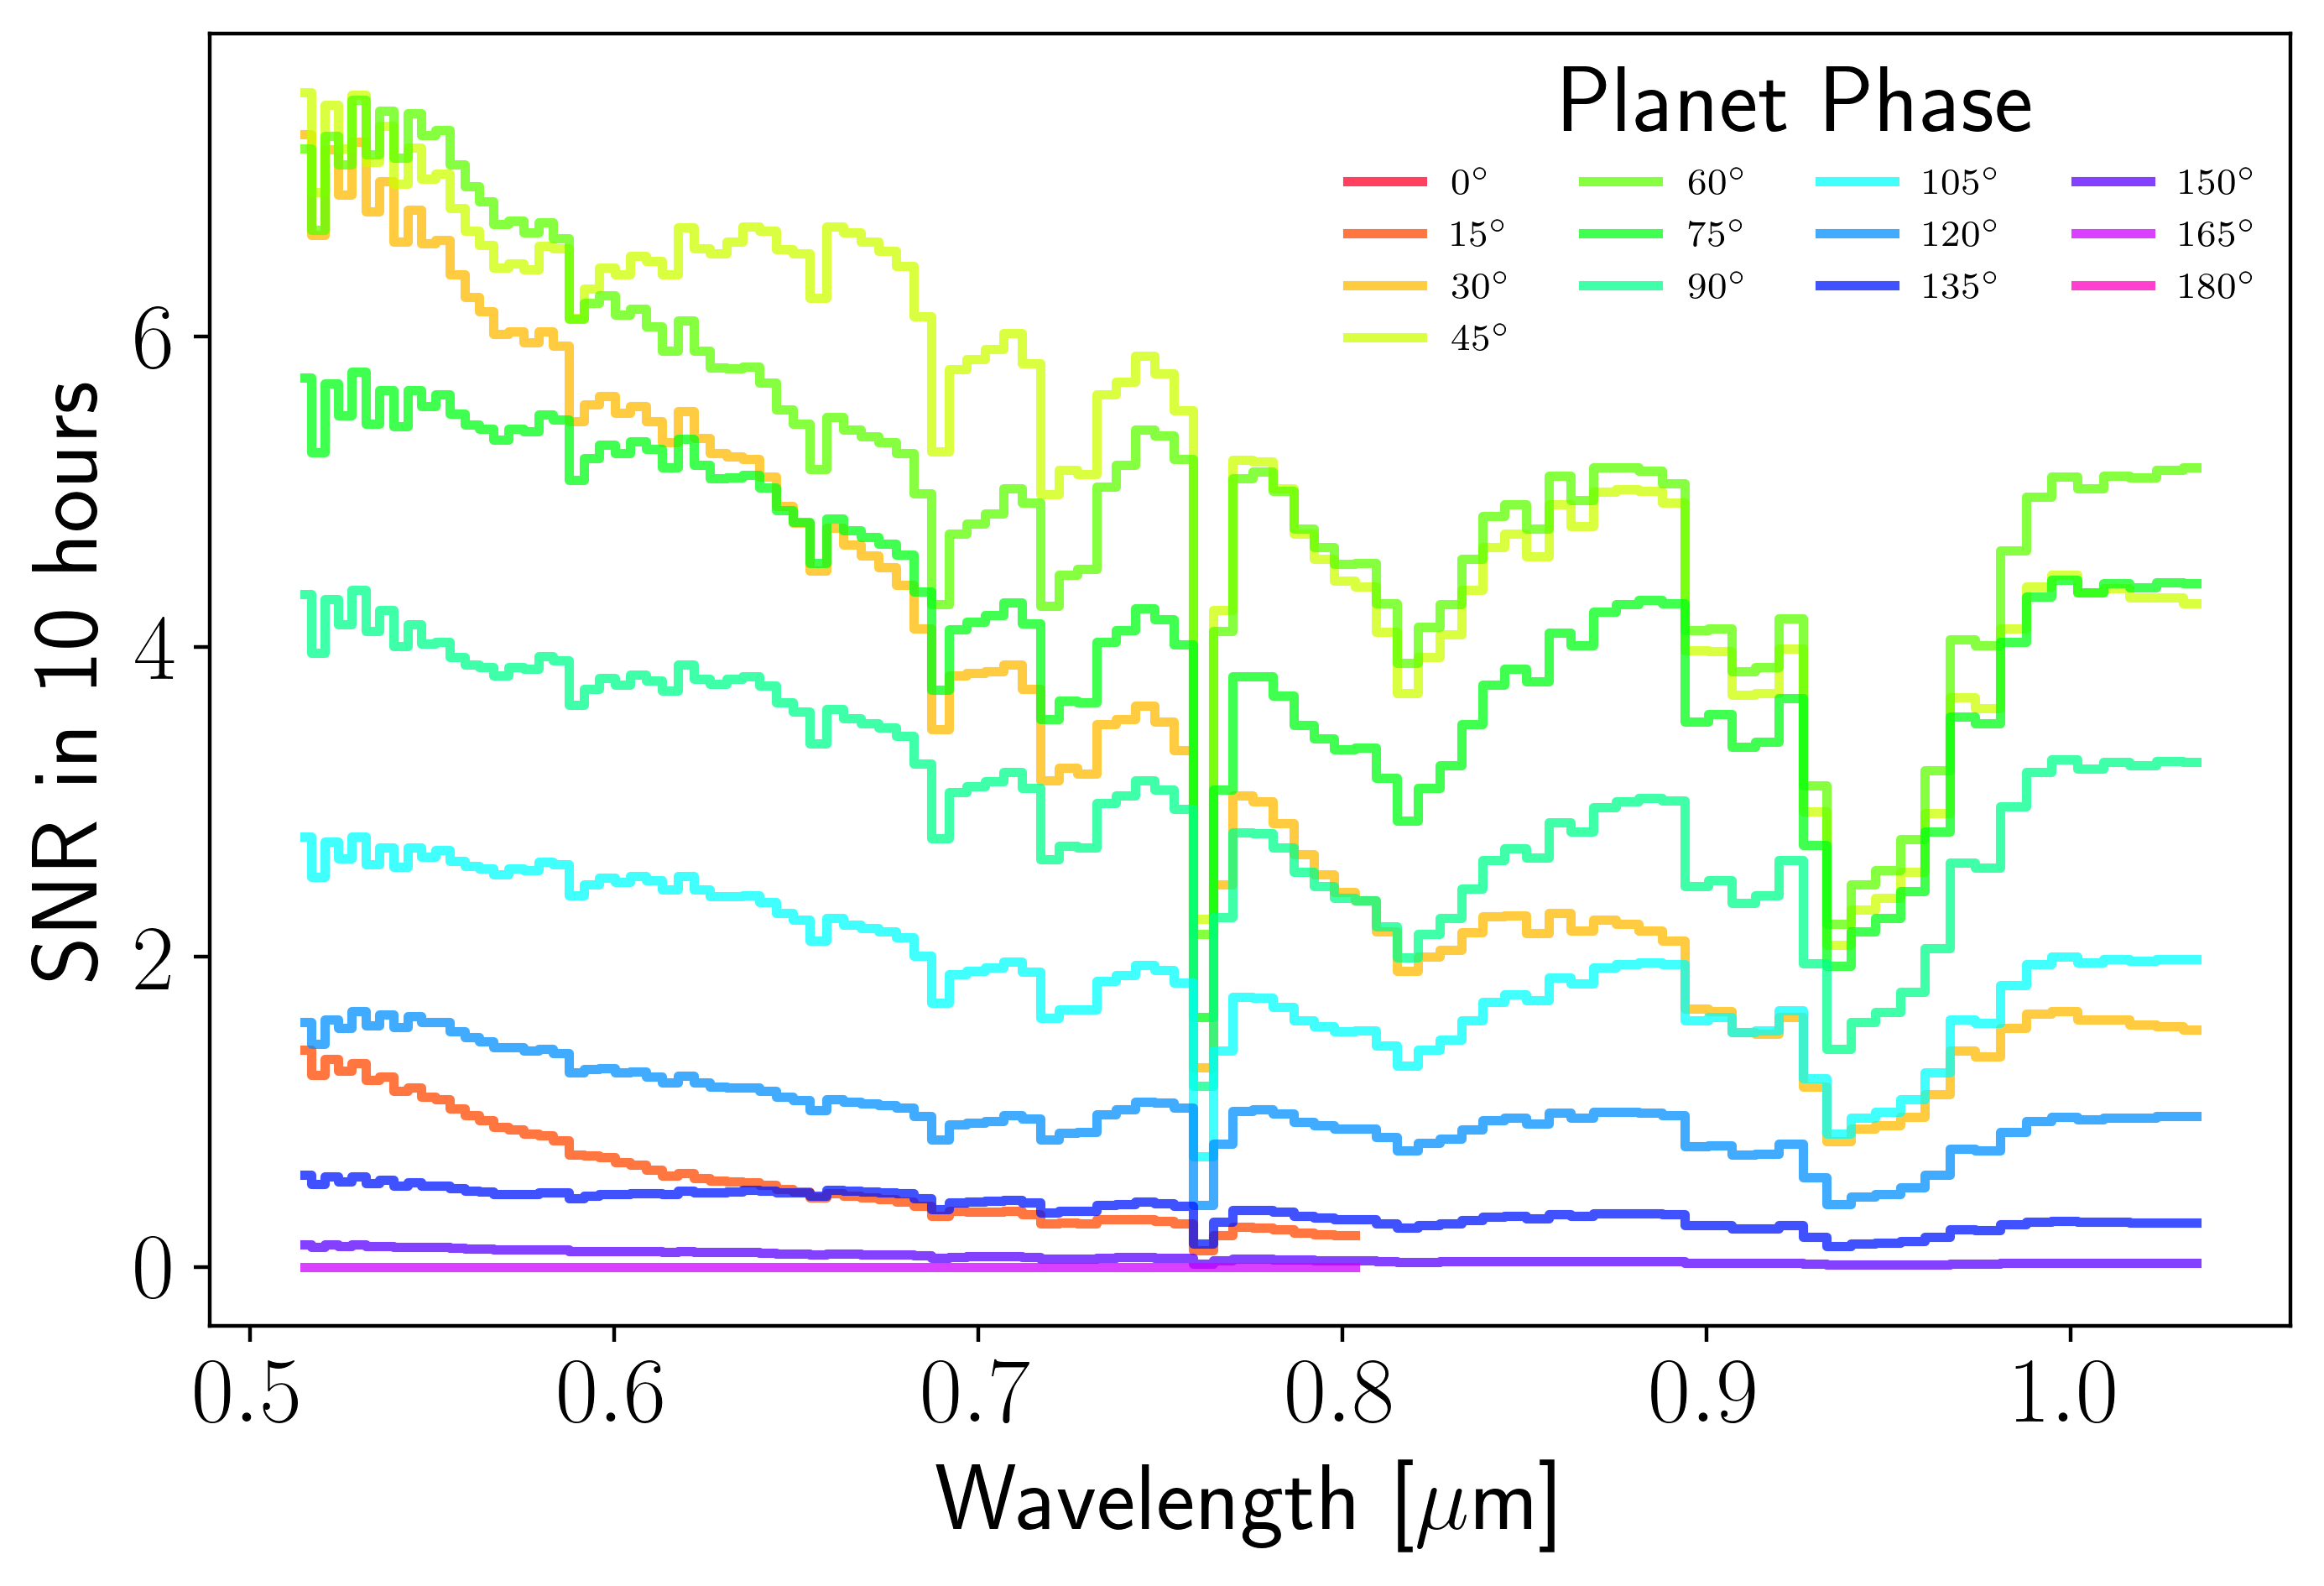

In [164]:
# Make plot
fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("SNR in %i hours" %noise.texp)

colors = mpl.cm.gist_rainbow(np.linspace(0.0, 1.0, len(phases)))

#ax.plot(noise.lam, noise.Cratio, lw = 3.0, ds = "steps-mid", alpha = 0.75, color="k")

for i, noise_tmp in enumerate(noise_calculations): 

    # Plot the spectrum
    ax.plot(noise_tmp.lam, noise_tmp.SNRt, label = "$%i^{\circ}$" %phases[i], lw = 2.0, ds = "steps-mid", alpha = 0.75, color=colors[i])
    #ax.errorbar(noise.lam, noise.Cobs, yerr=noise.Csig, fmt = ".", c = "k", ms = 3, lw = 1.0, label = "mock observations")

# Tweak aesthetics 
#ax.set_ylim(bottom = 0.0, top = 0.4)
ax.legend(fontsize = 8, framealpha = 0.0, ncol=4, title="Planet Phase");

The 0˚ and 180˚ lines aren't even on the plot since those have the planet at 0 $\lambda/D$ and returned all NaNs because none of the spectrum can be observed. The 15˚ and 165˚ are low SNR due to both poor contrast and low throughput and have a hard cutoff at 0.8 µm. The highest SNR spectrum in a fixed exposure time are the intermediate gibbous phases between 15˚ and 90˚. The 30˚ case is great around 500 nm, but drops steeply with wavelength, indicating that it is sitting right around the coronagraph transition point near the 50% throughput IWA. Critically, this doesn't mean that it's spectrum can't be observed, just that the noise will be highly wavelength dependent!   

Finally, we can also look at the noise term for the speckle count rate, which shows us how much stellar light has leaked past the coronagraph due to insufficient contrast. 

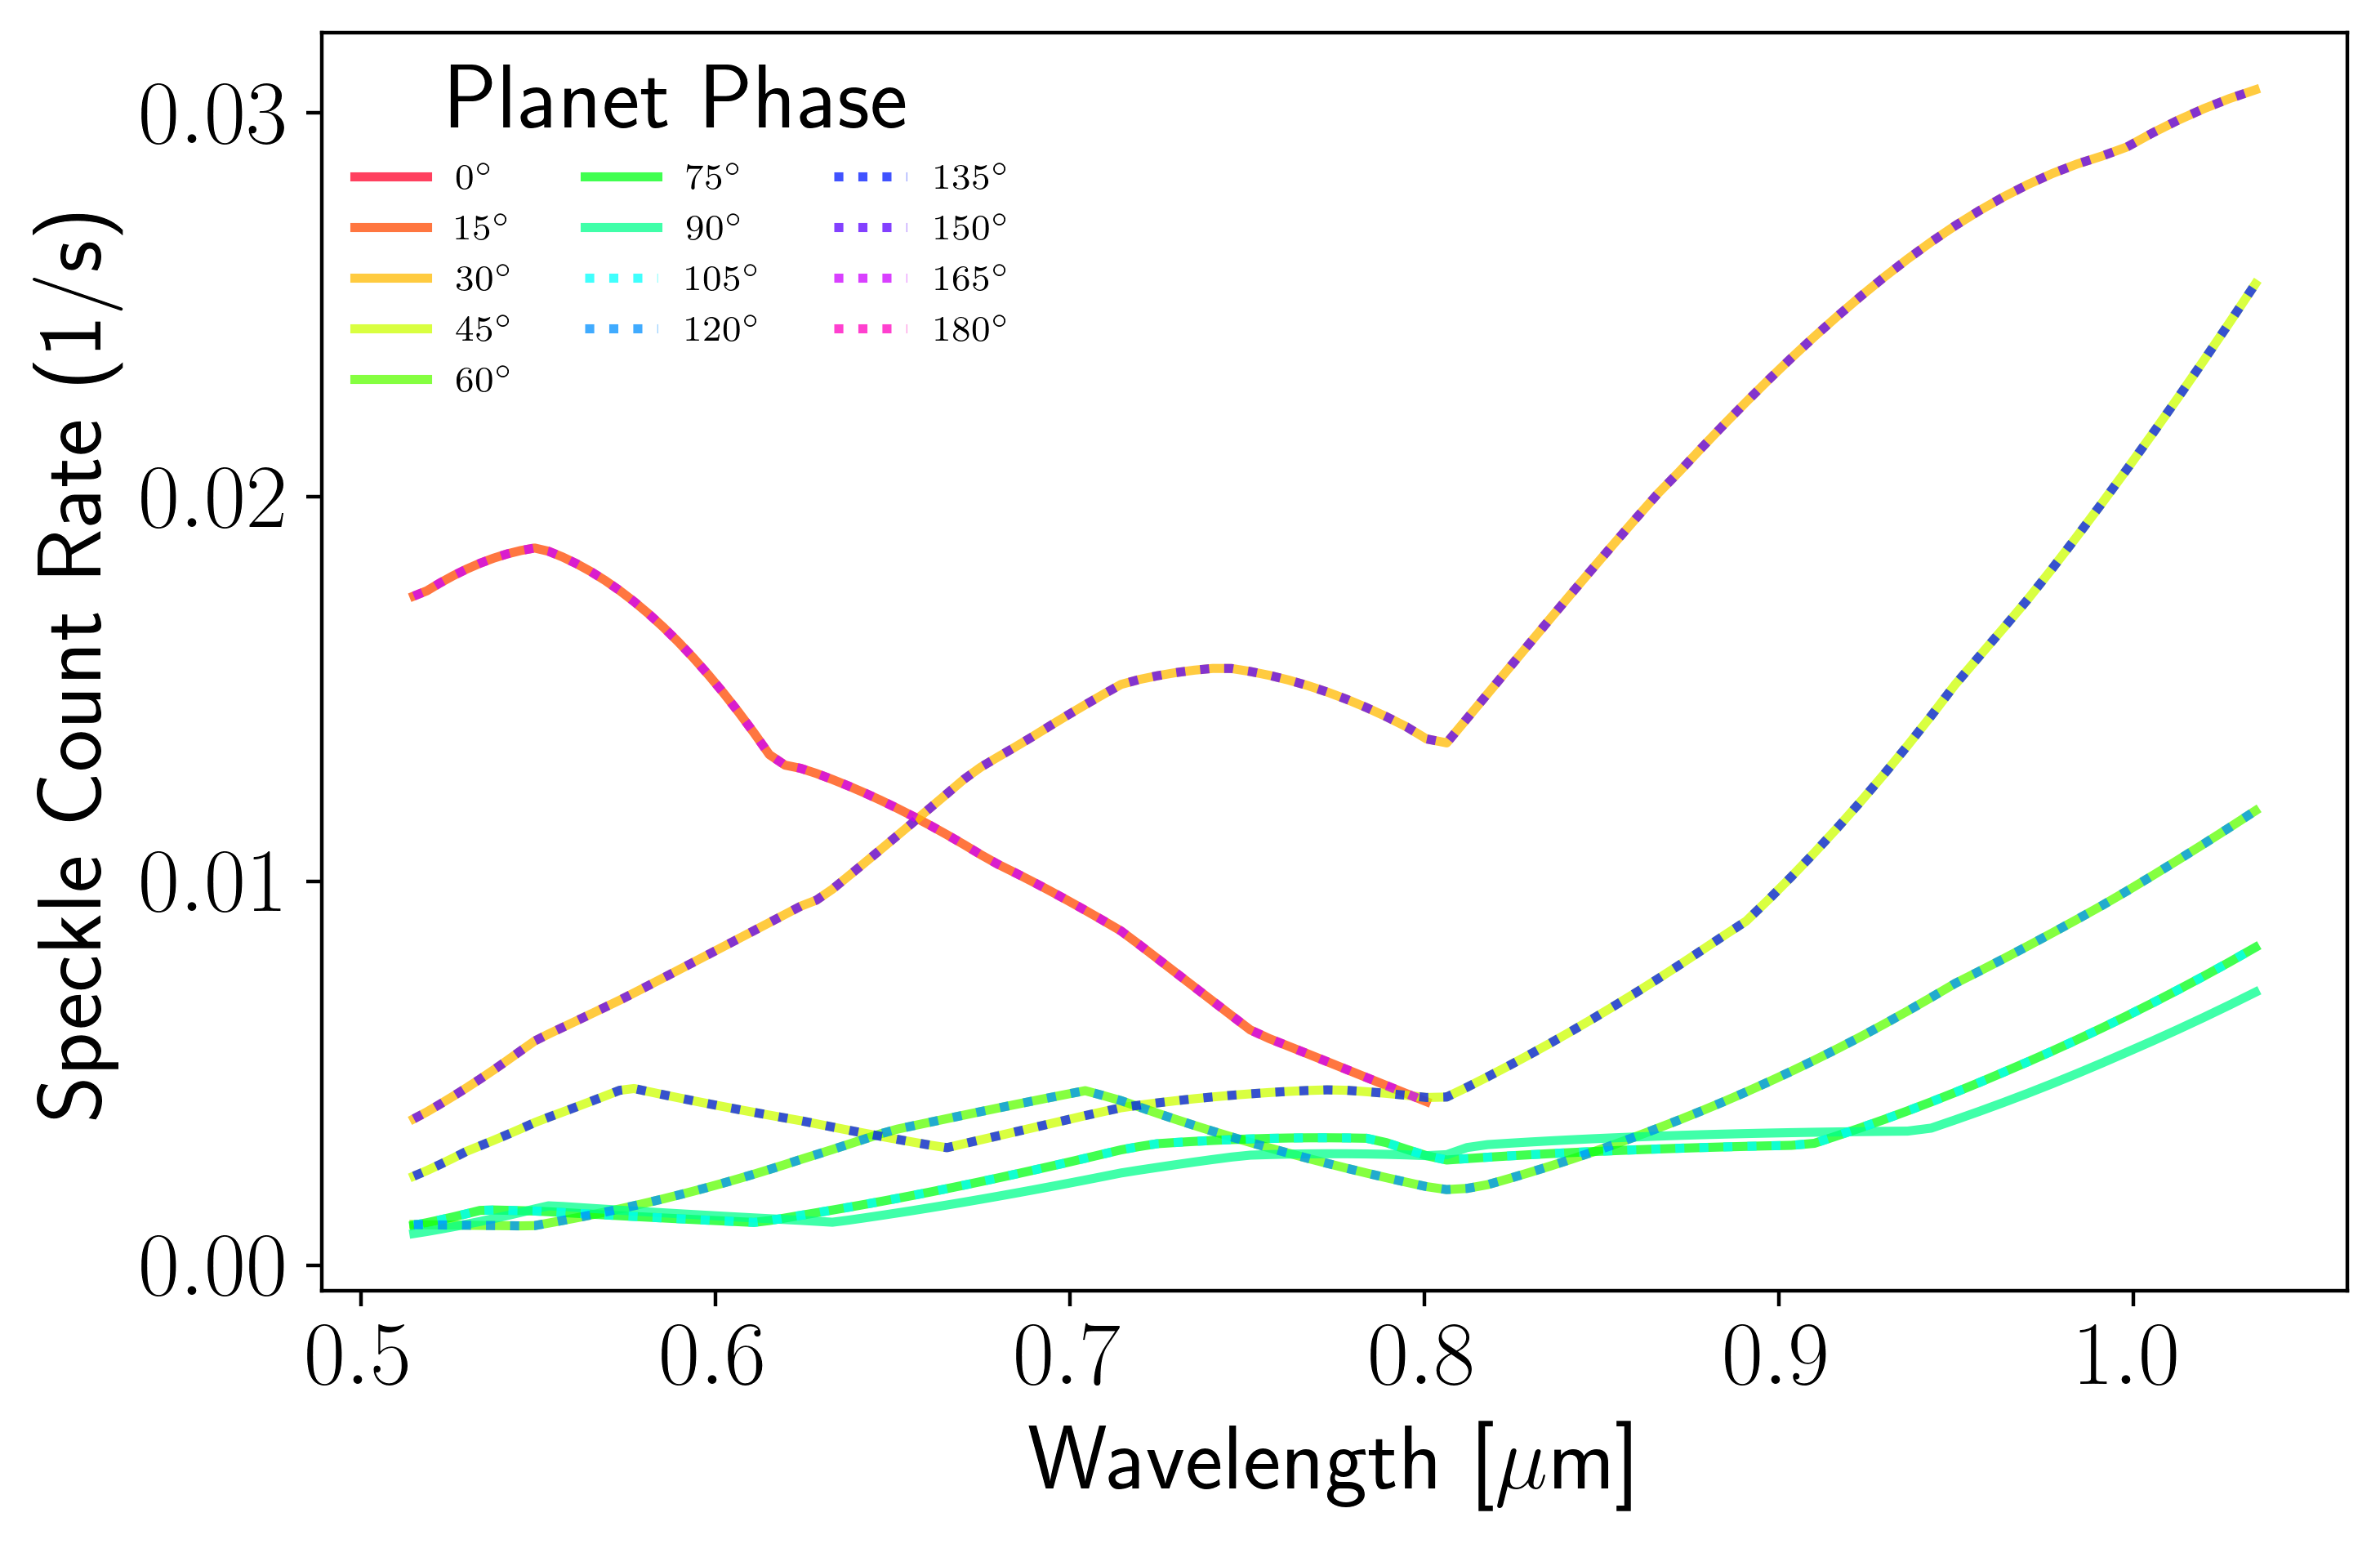

In [165]:
# Make plot
fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Speckle Count Rate (1/s)")

colors = mpl.cm.gist_rainbow(np.linspace(0.0, 1.0, len(phases)))

for i, noise_tmp in enumerate(noise_calculations): 

    # Plot the spectrum
    if i < 0.5*len(phases):
        ls = "-"
    else:
        ls= "dotted"
    
    ax.plot(noise_tmp.lam, noise_tmp.csp, label = "$%i^{\circ}$" %phases[i], ls=ls, lw = 2.0, alpha = 0.75, color=colors[i])
    #ax.errorbar(noise.lam, noise.Cobs, yerr=noise.Csig, fmt = ".", c = "k", ms = 3, lw = 1.0, label = "mock observations")

# Tweak aesthetics 
#ax.set_ylim(bottom = 0.0, top = 0.4)
ax.legend(fontsize = 8, framealpha = 0.0, ncol=3, title="Planet Phase");

We have lines overlapping here due to projected separation symmetry about 90˚, so dotted lines are used beyond 90˚. Note how that 30˚ case has an extremely steep specke count rate curve. This helps explain the SNR result seen above where SNR drops precipitously with wavelength due to speckle counts increasing as the planet falls through the coronagraph IWA. Comparing this case to our fiducial we can appreciate how uncertain the observations become toward 1 µm. 

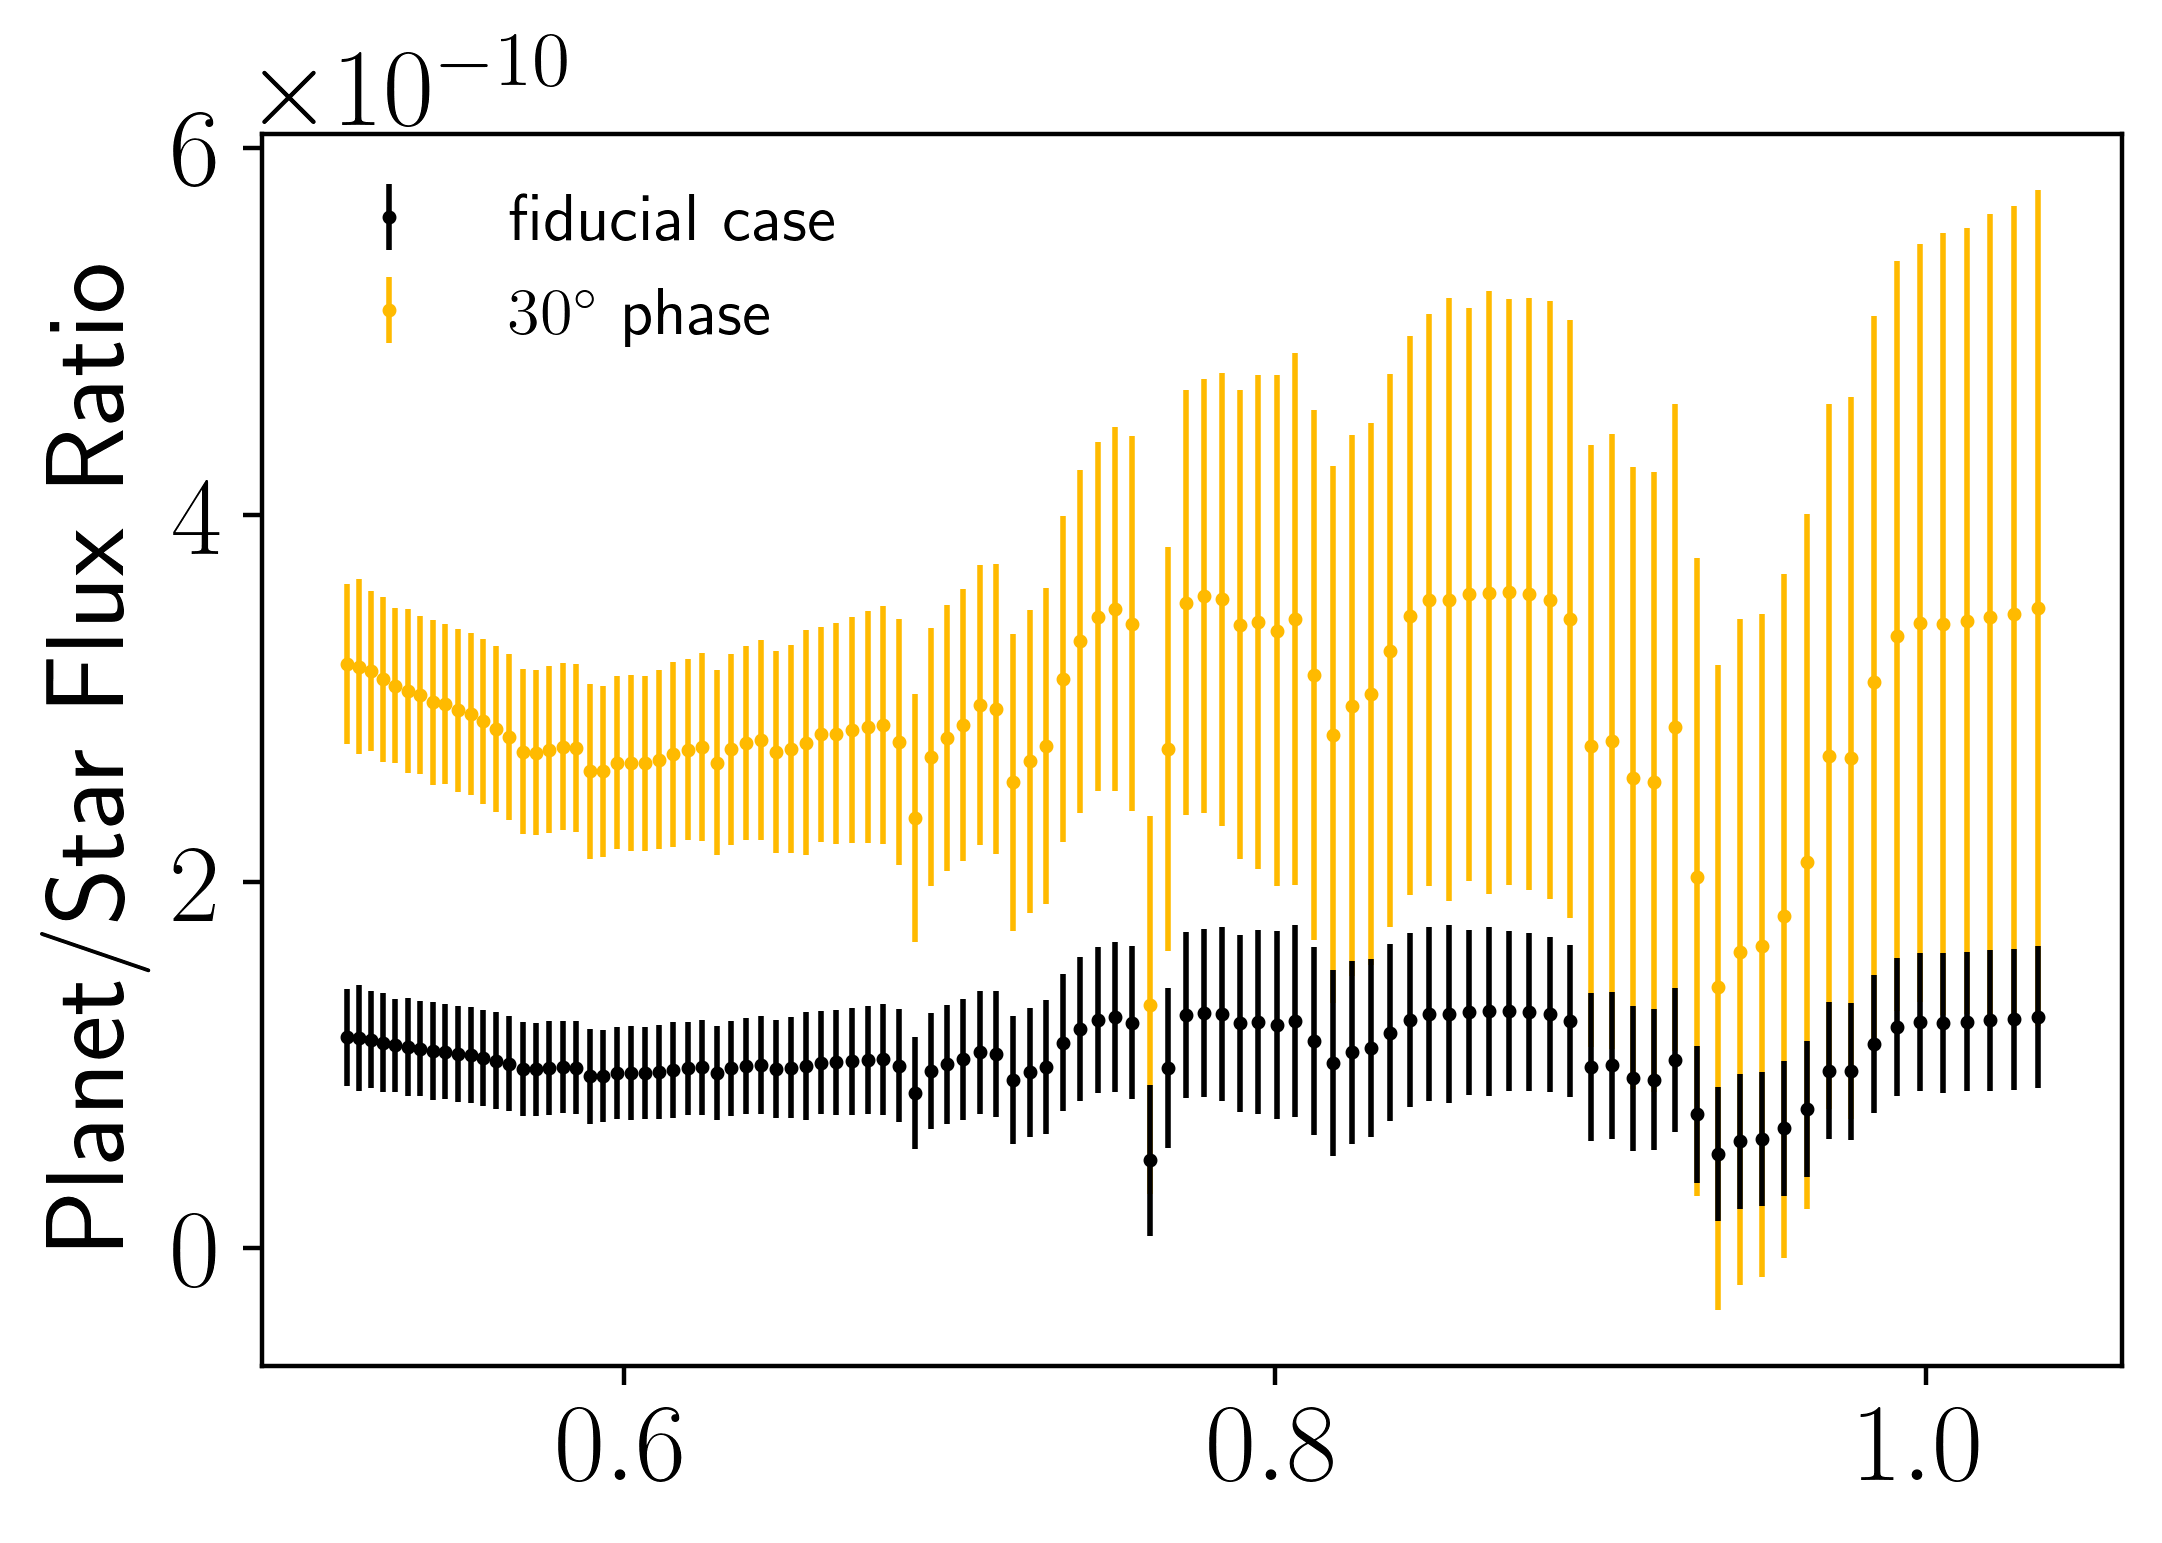

In [174]:
# Make plot
fig, ax = plt.subplots(figsize=(6,4))

ax.set_ylabel("Planet/Star Flux Ratio")

# Plot the simulated data
ax.errorbar(noise.lam, noise.Cratio, yerr=noise.Csig, fmt = ".", c = "k", ms = 3, lw = 1.0, label = "fiducial case", zorder=3)

i=2
ax.errorbar(noise_calculations[i].lam, noise_calculations[i].Cratio, yerr=noise_calculations[i].Csig, fmt = ".", c = colors[i], ms = 3, lw = 1.0, label = "$%i^{\circ}$ phase" %phases[i], zorder=2)

# Tweak aesthetics 
ax.legend(loc = "upper left", fontsize = 12, framealpha = 0.0);

Happy coronagraphing! 